In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
datasets = readRDS("/home/ncpsb//new_mnt/Other/jx/web/data/fast_explore/data/Refence_datasets_with_therapy.rds")
datasets_overview = read.csv("/home/ncpsb//new_mnt/Other/jx/web/data/fast_explore/data/datasets_overview.csv",quote = "")
datasets_names = read.csv("/home/ncpsb//new_mnt/Other/jx/web/data/fast_explore/data/dataset_name.csv",header = F,row.names = 1)

TCGA = readRDS("/srv/shiny-server/SNVIO_V10/data/TCGA/panacanlt_TCGA_log2.rds")
CPTAC = readRDS("/srv/shiny-server/SNVIO_V10/data/CPTAC/CPTAC.rds")

In [3]:
colnames(datasets_names) = "Cohort_name"
datasets_overview = cbind(datasets_names,datasets_overview)

In [4]:
datasets_overview$OS = FALSE
datasets_overview$PFS = FALSE
datasets_overview$RECIST = FALSE
datasets_overview$RESPONSE = FALSE
datasets_overview$TMB = FALSE
datasets_overview$RNA = FALSE
for(i in rownames(datasets_overview)){
    if( "OS_TIME" %in% colnames(datasets[[i]]) ){datasets_overview[i,"OS"] = TRUE}
    if( "PFS_TIME" %in% colnames(datasets[[i]]) ){datasets_overview[i,"PFS"] = TRUE}
    if( "RECIST" %in% colnames(datasets[[i]]) ){datasets_overview[i,"RECIST"] = TRUE}
    if( "RESPONSE" %in% colnames(datasets[[i]]) ){datasets_overview[i,"RESPONSE"] = TRUE}
    if( "TMB" %in% colnames(datasets[[i]]) ){datasets_overview[i,"TMB"] = TRUE}
}

datasets_overview[c("dataset2","dataset6","dataset8","dataset10","dataset11","dataset12","dataset13","dataset14","dataset20"),"RNA"] = TRUE

In [6]:
datasets_names$Cohort_name = gsub(pattern = "[0-9]*\\. (.*).*\\(.*","\\1",datasets_names$Cohort_name)
datasets_overview$Cohort_name = datasets_names$Cohort_name

In [7]:
datasets_rna_wes = readRDS("/home/ncpsb//new_mnt/Other/jx/web/data/fast_explore/data/Refence_datasets_rna_wes_with_therapy.rds")

# Overview

In [8]:
datasets_overview2 = datasets_overview[ !rownames(datasets_overview) %in% c("dataset1","dataset3","dataset6"),]

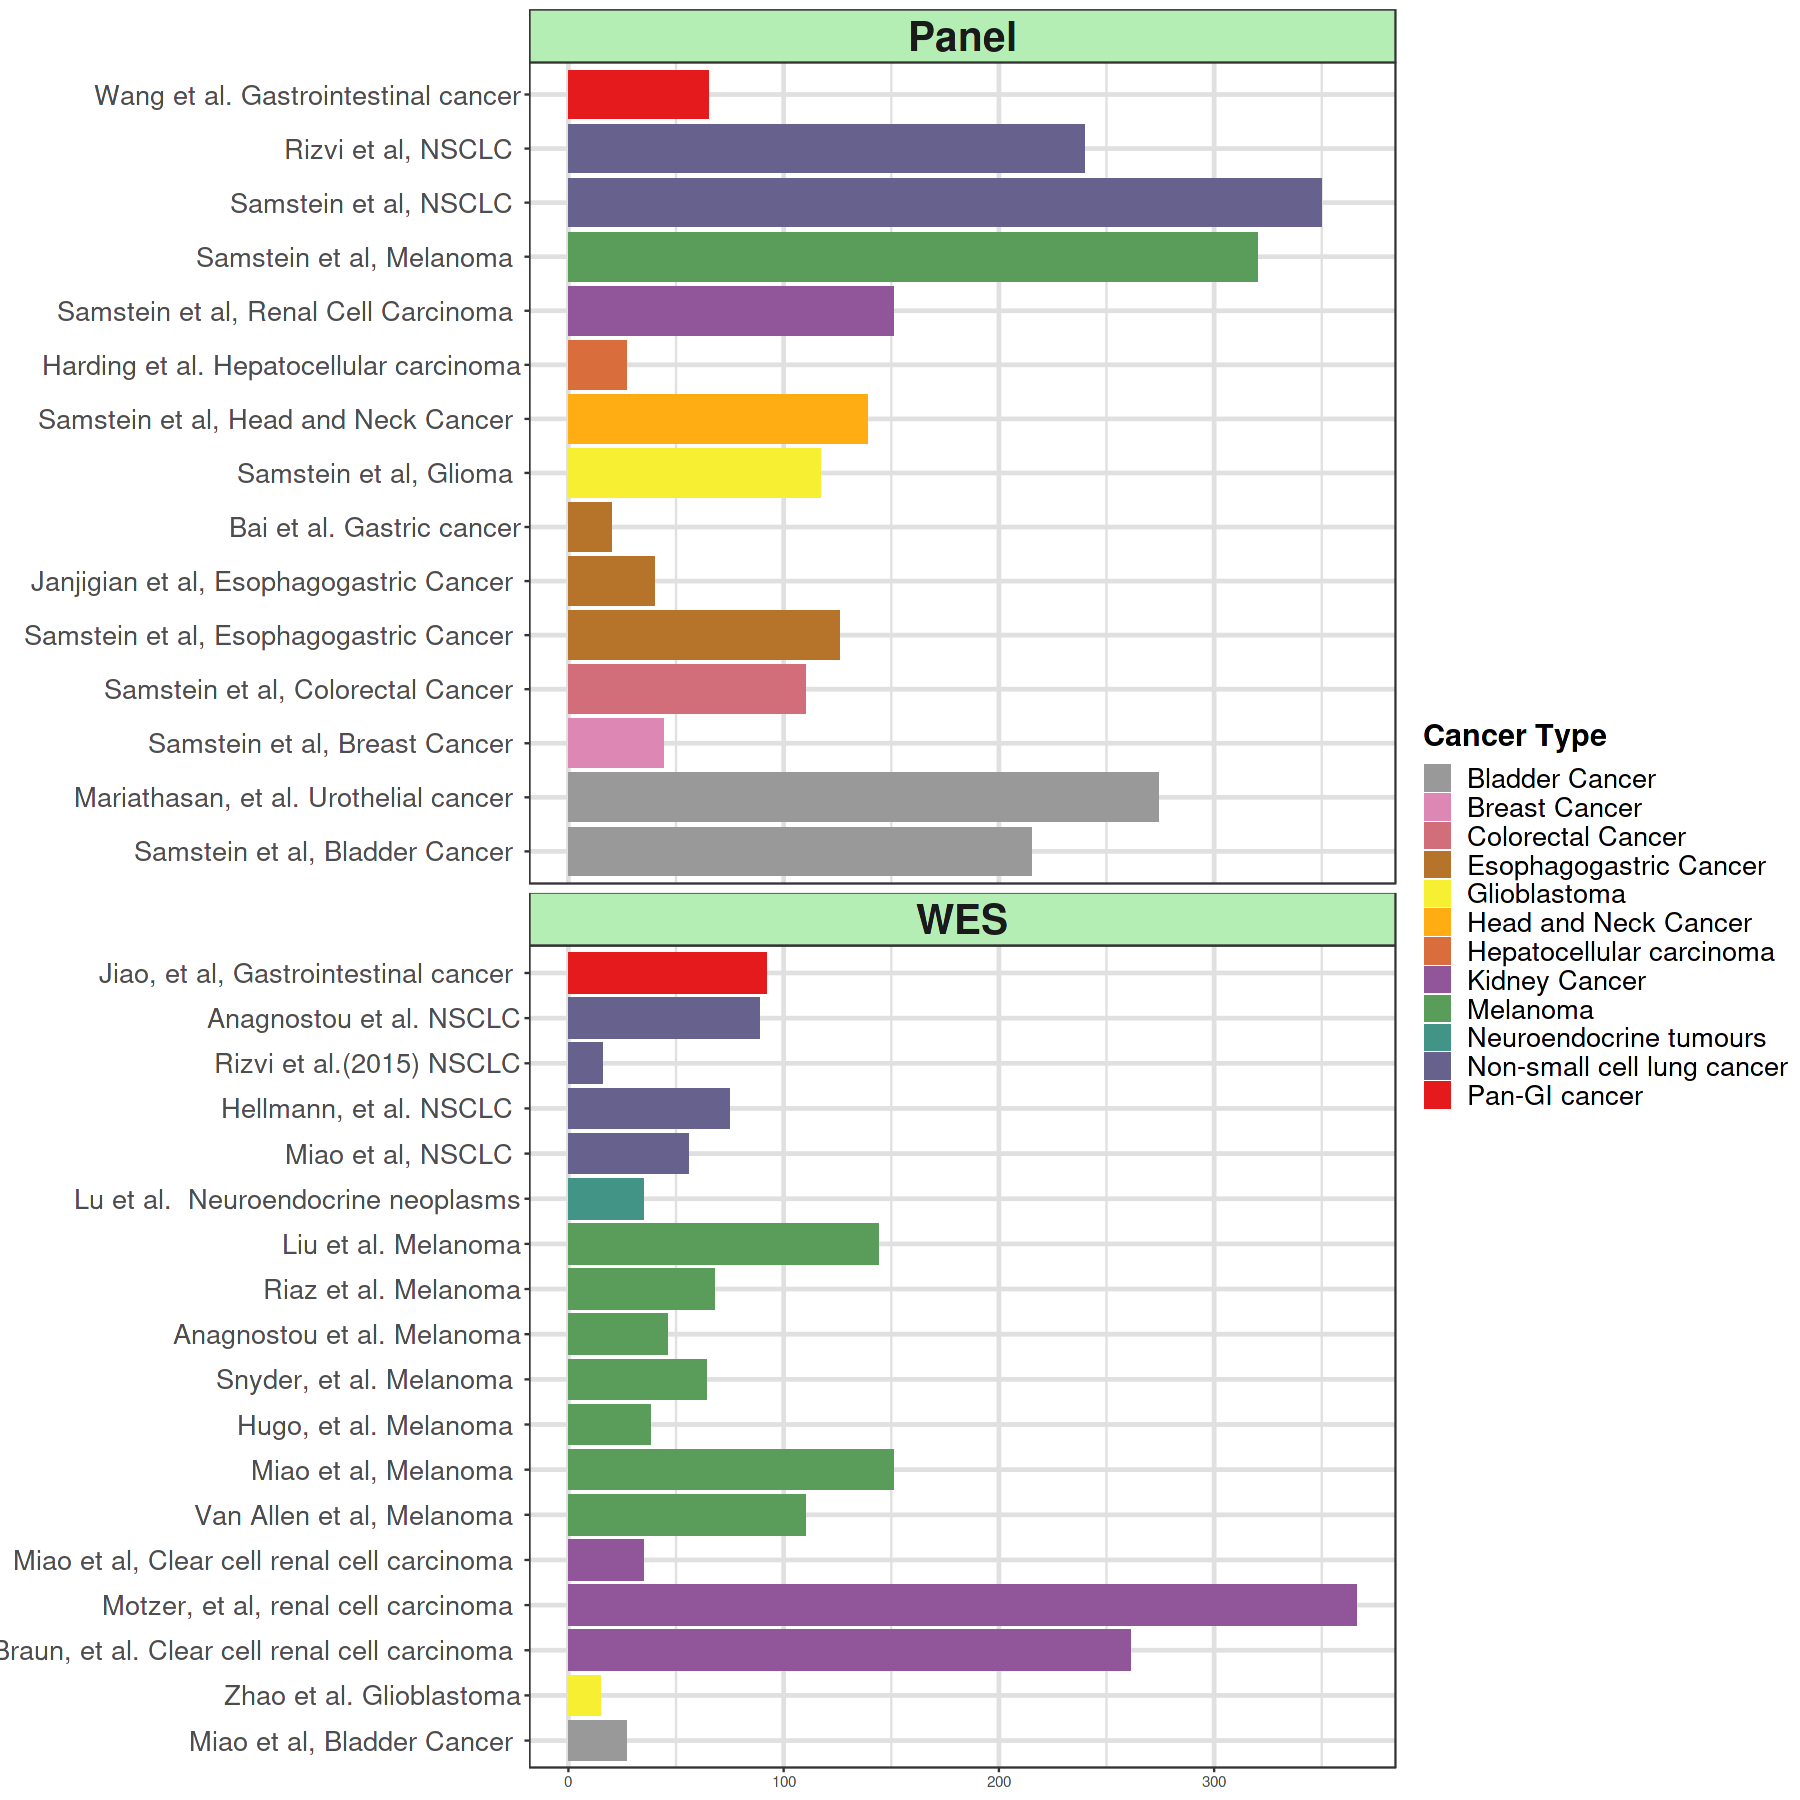

In [9]:
datasets_overview2 = datasets_overview2[ order(datasets_overview2$Cancer_type),]
datasets_overview2$Cohort_name = factor(datasets_overview2$Cohort_name,levels = datasets_overview2$Cohort_name)

options(repr.plot.height = 15, repr.plot.width = 15)
ggplot(datasets_overview2)+
    geom_bar(aes(x = Cohort_name,y = Cohort_size,fill = Cancer_type),stat = "identity")+
    scale_fill_manual(values = rev(colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(12)))+
    labs(fill = "Cancer Type")+
    coord_flip()+
# scale_y_continuous(expand = c(0,0))+
    facet_wrap(~Sequencing,scales = "free_y",ncol = 1)+
    theme_bw()+theme(strip.text = element_text(size = 24,face="bold"),
                     panel.grid = element_line(colour = "grey88",size = 1),
                     legend.title = element_text(size = 18,face = "bold"),
                     legend.text = element_text(size = 16),
                     axis.text.y = element_text(size=16),
                     strip.background = element_rect(fill = "darkseagreen2"),
                     axis.title = element_blank())

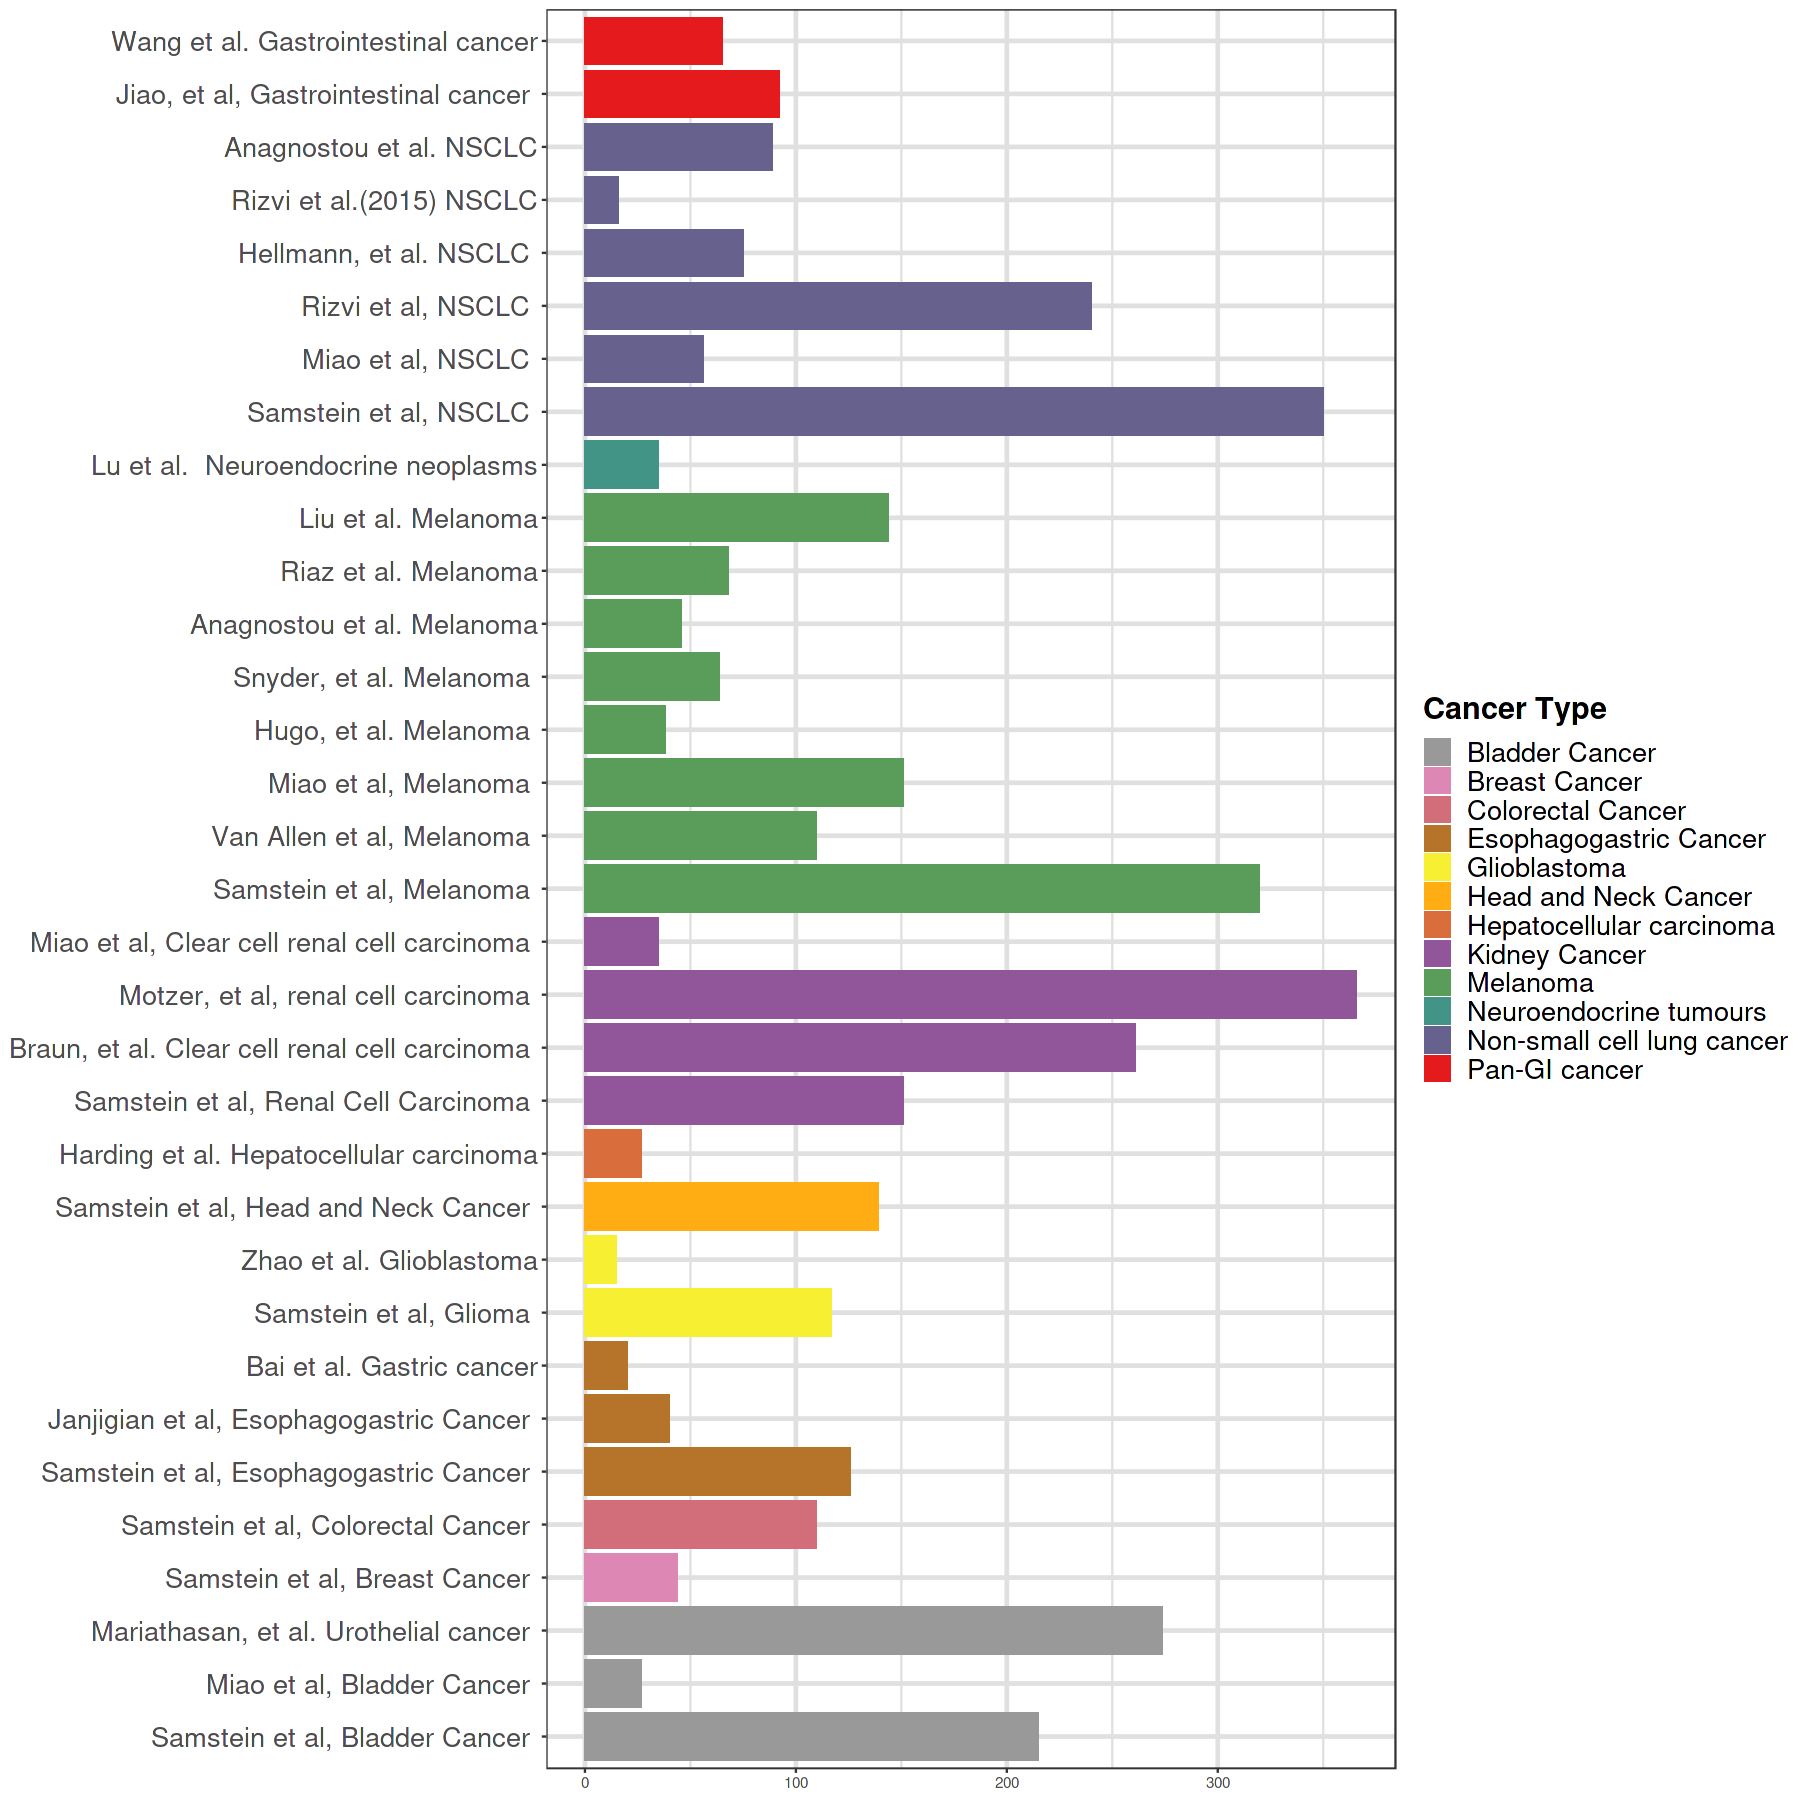

In [10]:
options(repr.plot.height = 15, repr.plot.width = 15)
p = ggplot(datasets_overview2)+
    geom_bar(aes(x = Cohort_name,y = Cohort_size,fill = Cancer_type),stat = "identity")+
    scale_fill_manual(values = rev(colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(12)))+
    labs(fill = "Cancer Type")+
    coord_flip()+
# scale_y_continuous(expand = c(0,0))+
#     facet_wrap(~Sequencing,scales = "free_y",ncol = 1)+
    theme_bw()+theme(strip.text = element_text(size = 24,face="bold"),
                     panel.grid = element_line(colour = "grey88",size = 1),
                     legend.title = element_text(size = 18,face = "bold"),
                     legend.text = element_text(size = 16),
                     axis.text.y = element_text(size=16),
                     strip.background = element_rect(fill = "darkseagreen2"),
                     axis.title = element_blank())
p

In [10]:
pdf("Artical_Figure2/Figure 1/Overview1.pdf",width = 12,height = 12)
p
dev.off()

png 
  2

In [11]:
datasets_overview2 = datasets_overview2[ order(datasets_overview2$Cancer_type),]
datasets_overview2$Cohort_name = factor(datasets_overview2$Cohort_name,levels = rev(datasets_overview2$Cohort_name))


datasets$dataset17$THERAPY = "anti-PD1/PDL1"
datasets$dataset20$THERAPY = "anti-PD1/PDL1"

datasets_overview2[["anti-PD1/PDL1"]]  = "No"
datasets_overview2[["anti-CTLA4"]]  = "No"
datasets_overview2[["anti-PD1/PDL1 + anti-CTLA4"]]  = "No"
datasets_overview2[["Anti-PD1/PDL1+Axitinib"]]  = "No"

for(i in rownames(datasets_overview2)){
    datasets_overview2[i,na.omit(unique(datasets[[i]]$THERAPY))] = "Yes"
}

annoM = reshape2::melt(datasets_overview2[,c("Cohort_name","anti-PD1/PDL1","anti-CTLA4","anti-PD1/PDL1 + anti-CTLA4","Anti-PD1/PDL1+Axitinib")],id.vars="Cohort_name")
annoM$variable = factor(annoM$variable,levels = rev(c("anti-PD1/PDL1","anti-CTLA4","anti-PD1/PDL1 + anti-CTLA4","Anti-PD1/PDL1+Axitinib")))

annoM$value = factor(annoM$value,levels = c("Yes","No"))


annoM2 = reshape2::dcast(datasets_overview2[,c("Cohort_name","Sequencing")],formula = Cohort_name~Sequencing)
annoM2[,2:3][!is.na(annoM2[,2:3])] = "Yes"
annoM2[,2:3][is.na(annoM2[,2:3])] = "No"
annoM2 = reshape2::melt(annoM2,id.vars="Cohort_name")
annoM2$value = factor(annoM2$value,levels = c("Yes","No"))

Using Sequencing as value column: use value.var to override.



In [12]:
a = ggplot(annoM)+
    geom_tile(aes(x = Cohort_name,y = variable,fill = value),colour="white",width = 0.9,height = 0.7)+
    scale_fill_manual(values = c("red","grey88"))+
    theme_bw()+
    labs(fill="Therapy")+
 scale_y_discrete(position = "right")+
    theme(panel.grid=element_blank(),
          axis.text.x = element_text(angle = 90,hjust = 1,size=16,),
          axis.title = element_blank(),
          axis.text.y = element_text(size=16),
          legend.title = element_text(size = 18,face = "bold"),
          legend.text = element_text(size = 16)
         )

b = ggplot(annoM2)+
    geom_tile(aes(x = Cohort_name,y = variable,fill = value),colour="white",width = 0.9,height = 0.7)+
    scale_fill_manual(values = c("blue","grey88"))+
    theme_bw()+
    labs(fill="Squencing")+
 scale_y_discrete(position = "right")+
    theme(panel.grid=element_blank(),
          axis.text.x = element_blank(),
          axis.title = element_blank(),
          axis.text.y = element_text(size=16),
          legend.title = element_text(size = 18,face = "bold"),
          legend.text = element_text(size = 16)
         )

c = ggplot(datasets_overview2)+
    geom_bar(aes(x = Cohort_name,y = Cohort_size,fill = Cancer_type),stat = "identity")+
# coord_flip()+
    scale_fill_manual(values = rev(colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(12)))+
    labs(fill = "Cancer Type")+
#     coord_flip()+
# scale_y_continuous(expand = c(0,0))+
#     facet_wrap(~Sequencing,scales = "free_y",ncol = 1)+
    theme_bw()+theme(strip.text = element_text(size = 24,face="bold"),
                     axis.ticks.x = element_blank(),
                     panel.grid = element_line(colour = "grey88",size = 1),
                     legend.title = element_text(size = 18,face = "bold"),
                     legend.text = element_text(size = 16),
                     axis.text.y = element_text(size=16),
                     axis.text.x = element_blank(),
                     strip.background = element_rect(fill = "darkseagreen2"),
                     axis.title = element_blank())

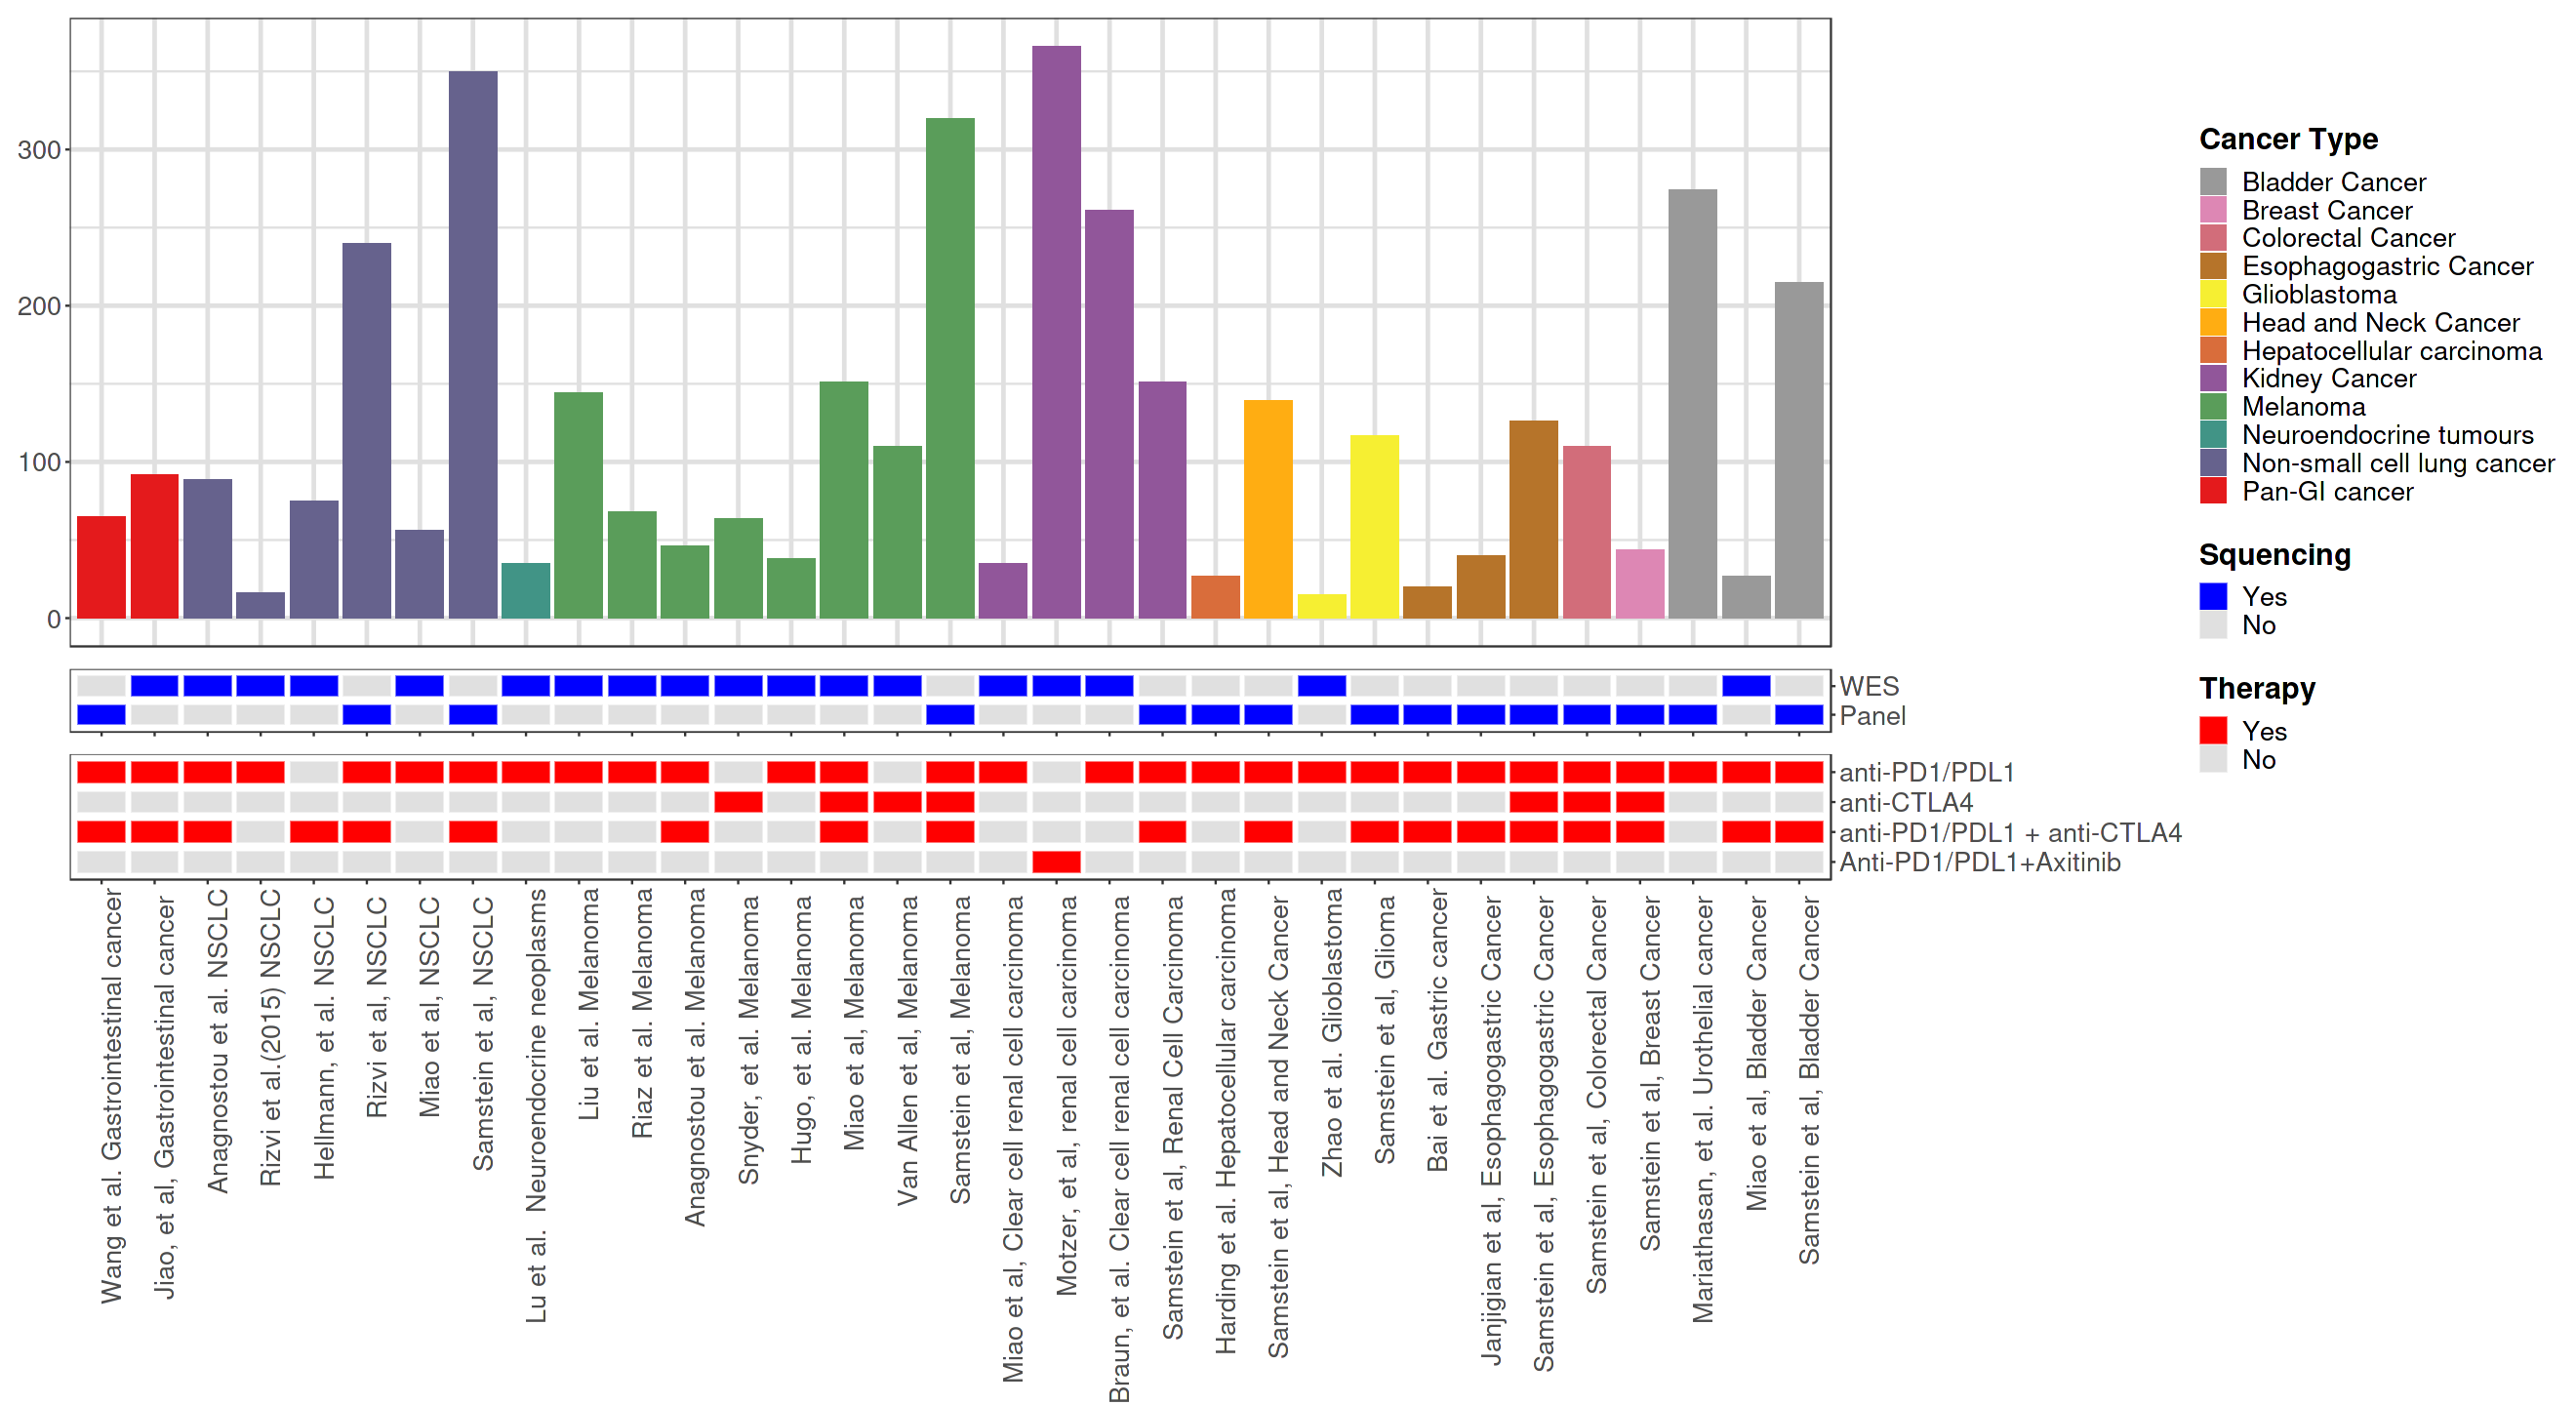

In [13]:
options(repr.plot.height = 12, repr.plot.width = 22)
library(patchwork)
(c + b  + a) + plot_layout(ncol = 1,height = c(5,0.5,1),guides = 'collect')

In [14]:
pdf("Artical_Figure2/Figure 1/Overview1.pdf",width = 22,height = 12)
(c + b  + a) + plot_layout(ncol = 1,height = c(5,0.5,1),guides = 'collect')
dev.off()

png 
  2

### donut chart

In [17]:
datasets$dataset17$THERAPY = "anti-PD1/PDL1"
datasets$dataset20$THERAPY = "anti-PD1/PDL1"
datasets$dataset19$THERAPY[ is.na(datasets$dataset19$THERAPY) ] = "anti-PD1/PDL1"
res = vector()
for(i in rownames(datasets_overview2)){
    res = rbind(res,data.frame(table(datasets[[i]]$THERAPY),i))
}

res$Cancer_type2 = datasets_overview[res$i,"Cancer_type2"]
res$Cancer_type = datasets_overview[res$i,"Cancer_type"]
res$Sequencing = datasets_overview[res$i,"Sequencing"]

res = res[ order(res$Cancer_type),]
res = res[ order(res$Cancer_type2),]

Warning message:
“Setting row names on a tibble is deprecated.”


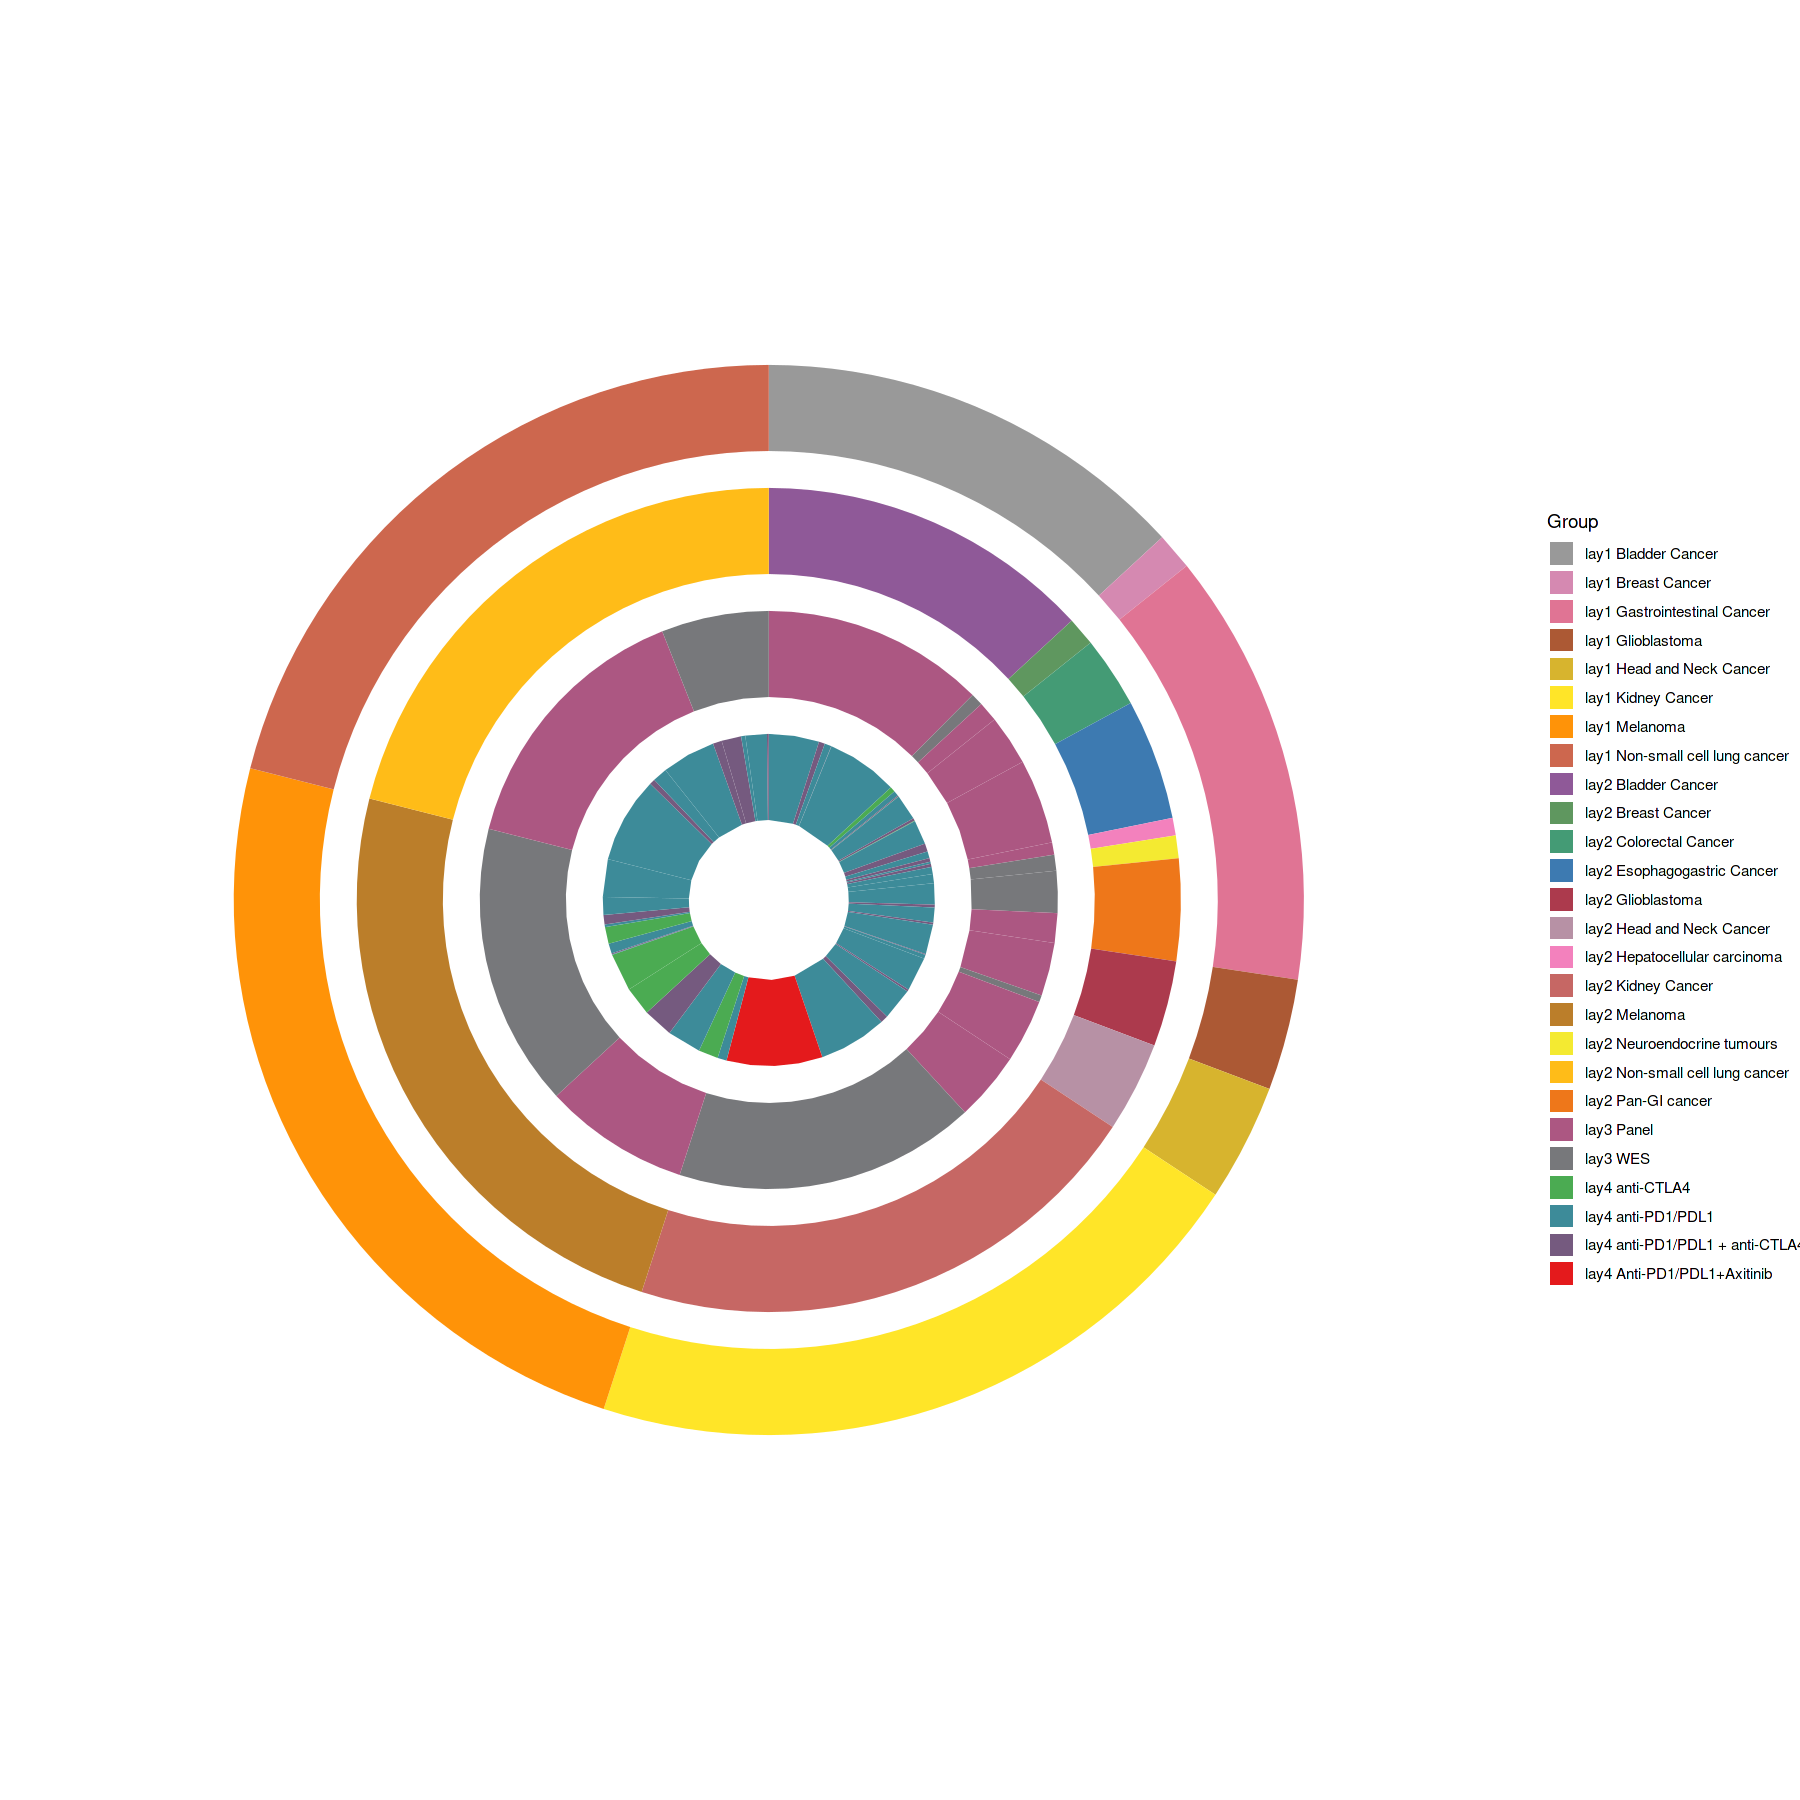

In [18]:
lay1 = res %>% group_by(Cancer_type2) %>% summarise(sum(Freq))
lay1$lay = 3
colnames(lay1) = c("Group","Freq","lay")
lay1$Group = paste("lay1",lay1$Group)

lay2 = res %>% group_by(Cancer_type) %>% summarise(sum(Freq))
lay2$lay = 2
colnames(lay2) = c("Group","Freq","lay")
rownames(lay2) = lay2$Group
lay2 = lay2[ unique(res$Cancer_type),]
lay2$Group = paste("lay2",lay2$Group)

lay3 = vector()
for(i in unique(res$Cancer_type)){
    tmp_res = res[ res$Cancer_type == i,]
    for(j in unique(tmp_res$Sequencing)){
        tmp_res2 = tmp_res[ tmp_res$Sequencing == j,]
        lay3 = rbind(lay3,c(j,sum(tmp_res2$Freq),1))
    }
}
lay3 = as.data.frame(lay3)
colnames(lay3) = c("Group","Freq","lay")
lay3$Group = paste("lay3",lay3$Group)
lay3$Freq = as.numeric(lay3$Freq)
lay3$lay = as.numeric(lay3$lay)

lay4 = res[,1:2]
lay4$lay = 0
colnames(lay4) = c("Group","Freq","lay")
lay4$Group = paste("lay4",lay4$Group)
# lay3$Group = factor(lay3$Group,levels = unique(lay3$Group))
lay = rbind(lay1,lay2,lay3,lay4)

n = length(unique(lay$Group))
col2 = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(n)
col2 = c(col2[seq(1,n,by = 2)],col2[seq(2,n,by = 2)])

ggplot(lay)+
    geom_bar(aes(x = lay,y = Freq,group = lay,fill=Group),stat="identity",position="stack",width = 0.7)+
    scale_fill_manual(values = rev(col2))+
    xlim(c(-1,  4))+
    coord_polar(theta = "y")+theme_void()+
guides(fill=guide_legend(ncol = 1,override.aes = list(size=5)))

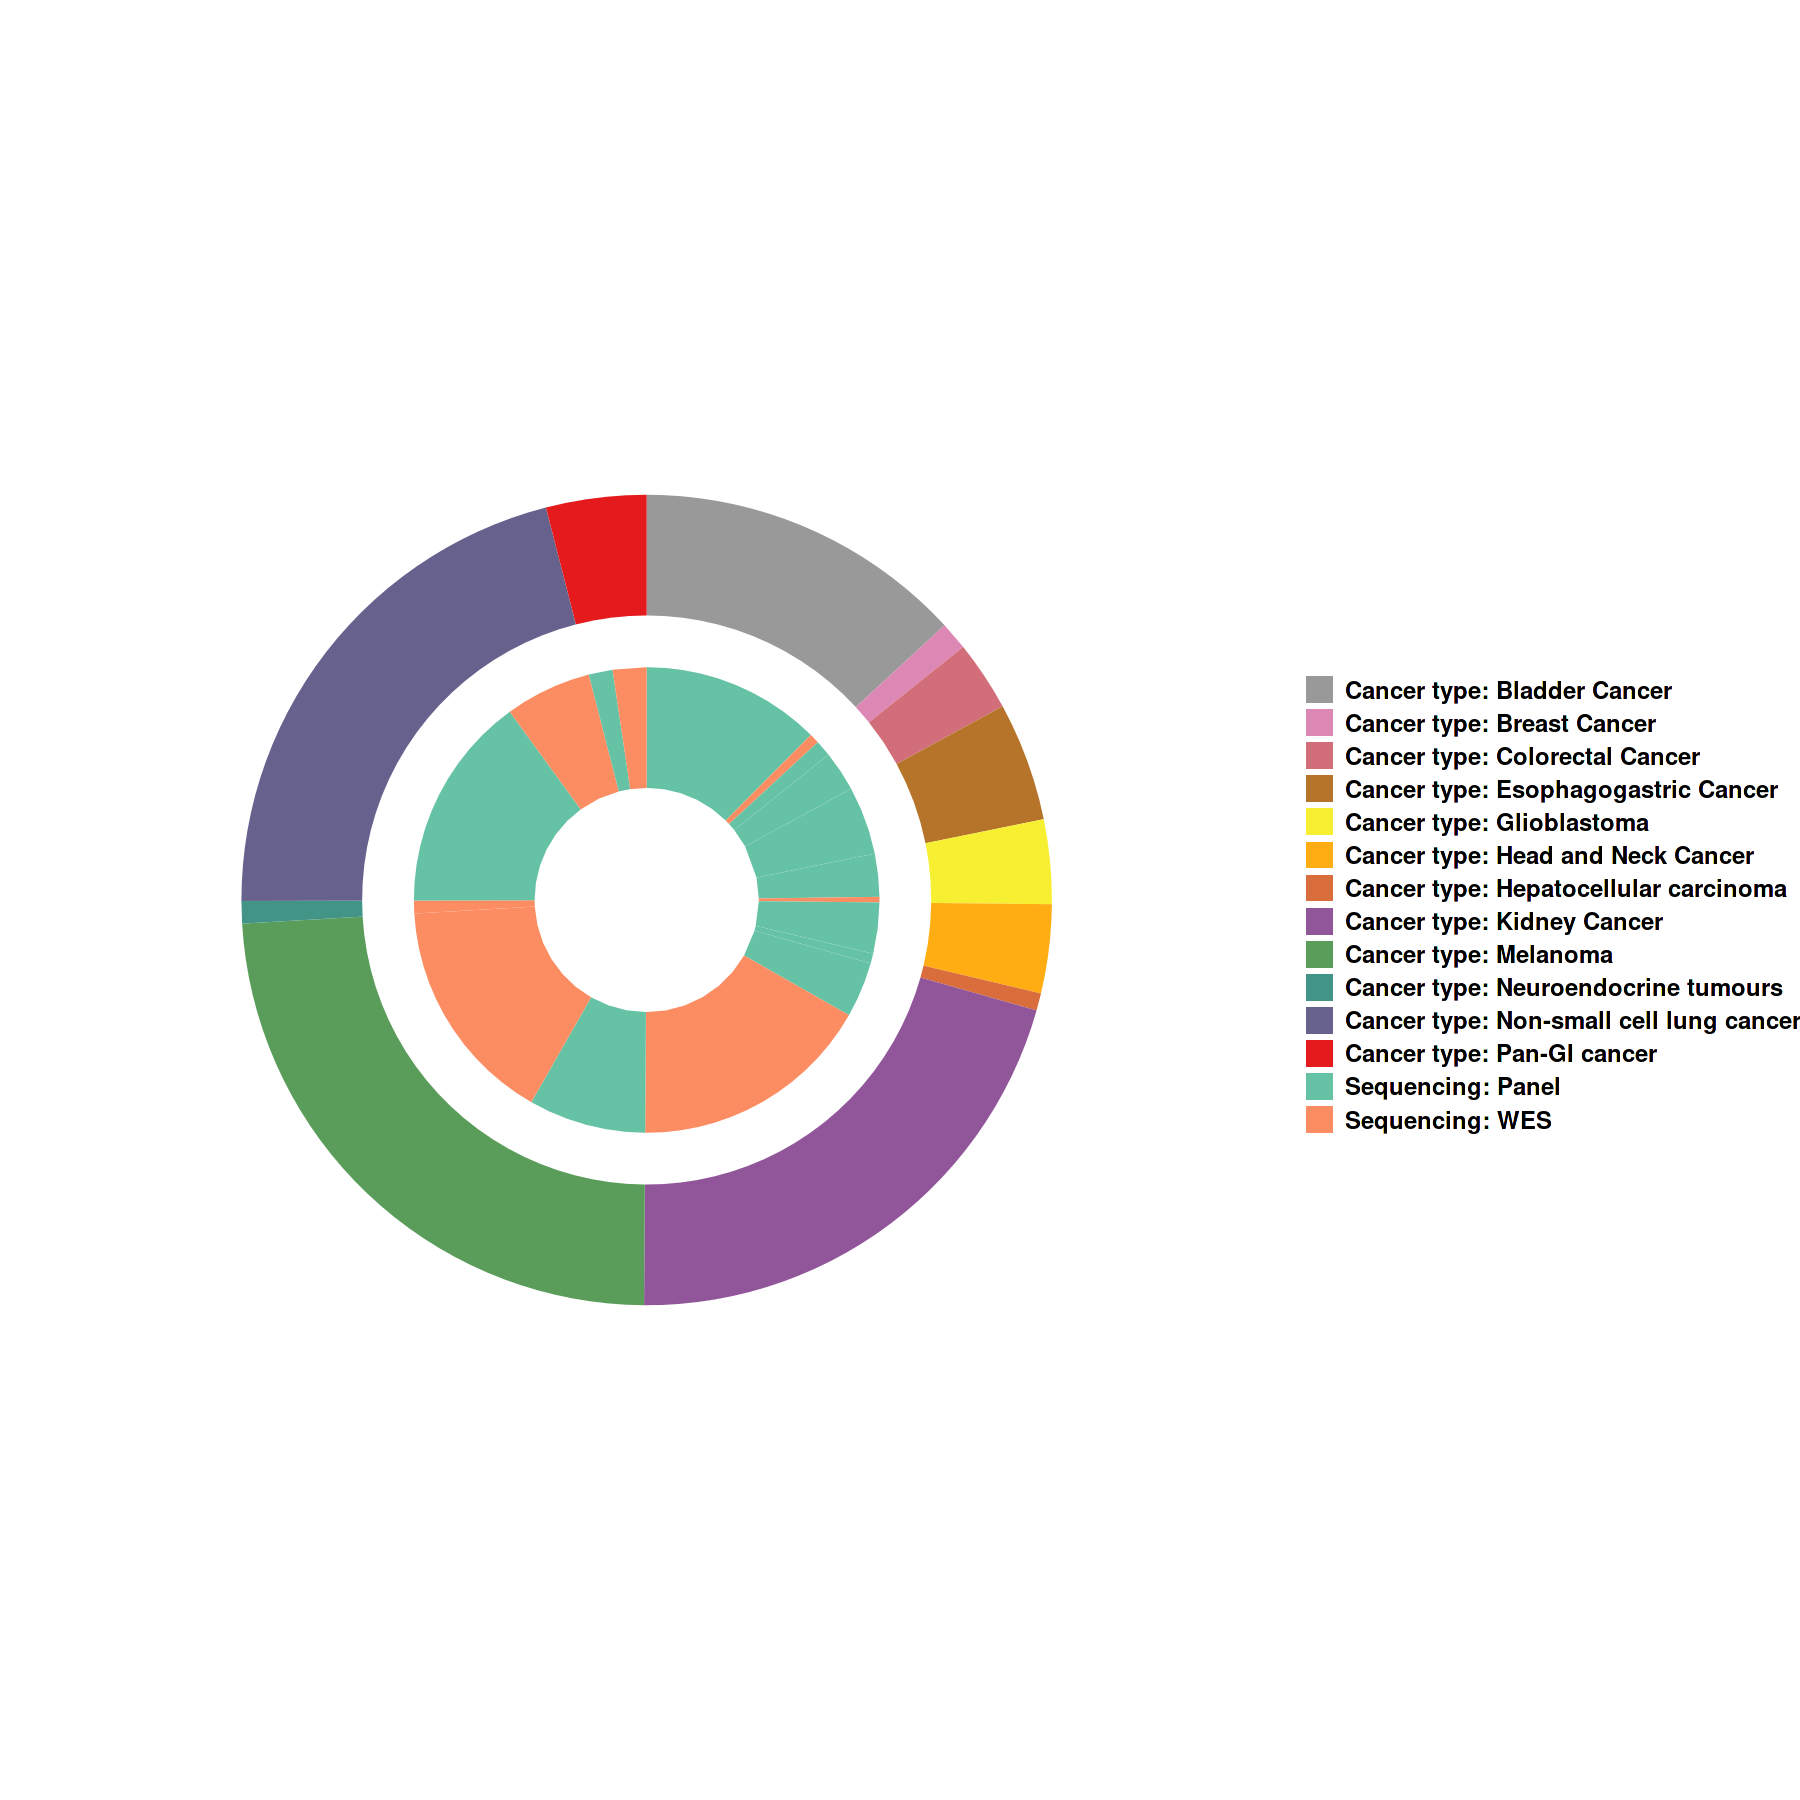

In [20]:

datasets$dataset17$THERAPY = "anti-PD1/PDL1"
datasets$dataset20$THERAPY = "anti-PD1/PDL1"
datasets$dataset19$THERAPY[ is.na(datasets$dataset19$THERAPY) ] = "anti-PD1/PDL1"

res = vector()
for(i in rownames(datasets_overview2)){
    res = rbind(res,data.frame(table(datasets[[i]]$THERAPY),i))
}

res$Cancer_type2 = datasets_overview[res$i,"Cancer_type2"]
res$Cancer_type = datasets_overview[res$i,"Cancer_type"]
res$Sequencing = datasets_overview[res$i,"Sequencing"]

res = res[ order(res$Sequencing),]
res = res[ order(res$Cancer_type),]

lay1 = res %>% group_by(Cancer_type) %>% summarise(sum(Freq))
lay1$lay = 2
colnames(lay1) = c("Group","Freq","lay")
lay1$Group = paste("Cancer type:",lay1$Group)

lay3 = vector()
for(i in unique(res$Cancer_type)){
    tmp_res = res[ res$Cancer_type == i,]
    for(j in unique(tmp_res$Sequencing)){
        tmp_res2 = tmp_res[ tmp_res$Sequencing == j,]
        lay3 = rbind(lay3,c(j,sum(tmp_res2$Freq),1))
    }
}
lay3 = as.data.frame(lay3)
colnames(lay3) = c("Group","Freq","lay")
lay3$Group = paste("Sequencing:",lay3$Group)
lay3$Freq = as.numeric(lay3$Freq)
lay3$lay = as.numeric(lay3$lay)

lay = rbind(lay1,lay3)

n = length(unique(lay$Group))
col2 = c(rev(colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(12)),RColorBrewer::brewer.pal(8,"Set2")[1:2])

p = ggplot(lay)+
    geom_bar(aes(x = lay,y = Freq,group = lay,fill=Group),stat="identity",position="stack",width = 0.7)+
#     ggrepel::geom_text_repel(data = lay1,aes(x = lay,y = Freq,label = Group),stat="identity",position=position_stack(vjust = 0.5))+ 
    scale_fill_manual(values = col2)+
    xlim(c(0,  3))+
    coord_polar(theta = "y")+theme_void()+
guides(fill=guide_legend(ncol = 1,override.aes = list(size=7)))+
theme(legend.title = element_blank(),legend.text = element_text(size = 14,face="bold"))
p
# ggplot()+
#     geom_bar(data = lay1,aes(x = lay,y = Freq,group = lay,fill=Group),stat="identity",position="stack",width = 0.7)+
#     geom_bar(data = lay3,aes(x = lay,y = Freq,group = lay,fill=Group),stat="identity",position="stack",width = 0.7)+
# #     ggrepel::geom_text_repel(data = lay1,aes(x = lay,y = Freq,label = Group),stat="identity",position=position_stack(vjust = 0.5))+ 
#     scale_fill_manual(values = rev(col2))+
#     xlim(c(0,  3))+
#     coord_polar(theta = "y")+theme_void()+
# guides(fill=guide_legend(ncol = 1,override.aes = list(size=5)))

In [22]:
pdf("Artical_Figure2/Figure 1/Overview2.pdf",width = 12,height = 12)
p
dev.off()

png 
  2

In [21]:
sum(lay[ lay$Group == "Sequencing: Panel","Freq"])
sum(lay[ lay$Group == "Sequencing: WES","Freq"])

sum(lay[ lay$Group == "Sequencing: Panel","Freq"]) + sum(lay[ lay$Group == "Sequencing: WES","Freq"])

[1] 2238

[1] 1688

[1] 3926

In [22]:
sum(datasets_overview2$Cohort_size)

[1] 3926

Warning message:
“Ignoring unknown parameters: width”
Warning message:
“Ignoring unknown aesthetics: fill”


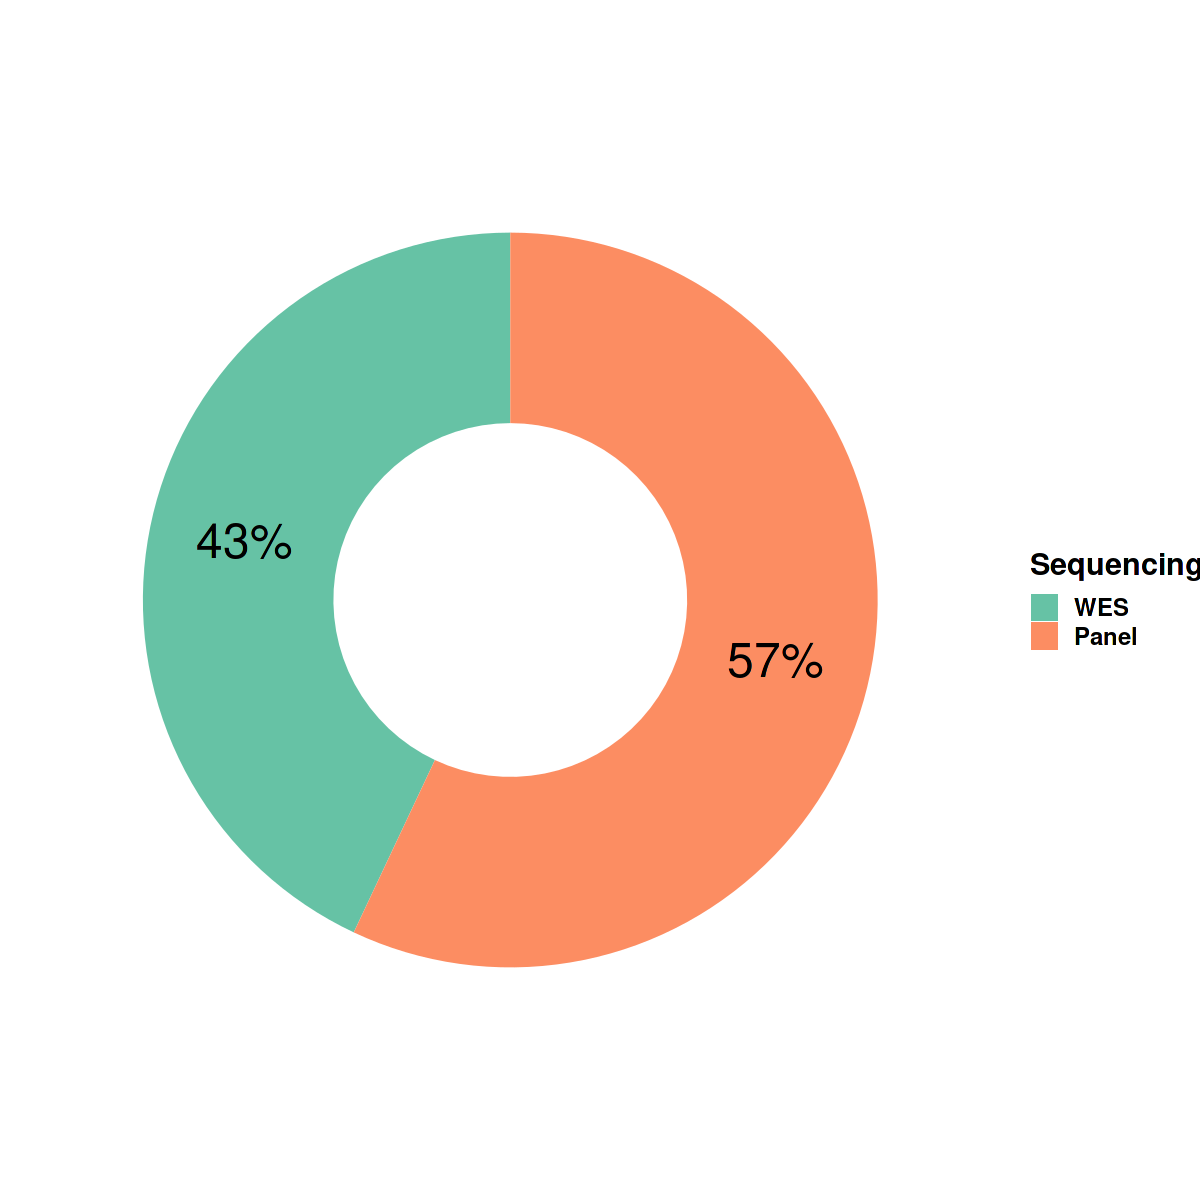

In [23]:
options(repr.plot.height = 10, repr.plot.width = 10)
p = ggplot()+
geom_bar(aes(x=1,y = c(1688,2238),fill = factor(c("WES","Panel"),levels = c("WES","Panel"))),stat="identity",position="stack",width = 0.7)+
geom_text(aes(x = 1,y = c(1688,2238),fill = factor(c("WES","Panel"),levels = c("WES","Panel")),label = c("43%","57%")),stat="identity",position=position_stack(vjust = 0.5),width = 0.7,size = 10)+
xlim(c(0,  1.5))+
labs(fill = "Sequencing")+
coord_polar(theta = "y")+
theme_void()+
scale_fill_manual(values = RColorBrewer::brewer.pal(8,"Set2")[1:2])+
theme(legend.title = element_text(size = 18,face="bold"),legend.text = element_text(size = 14,face="bold"))
p

In [24]:
pdf("Artical_Figure2/Figure 1/Overview2.pdf",width = 12,height = 12)
p
dev.off()

png 
  2

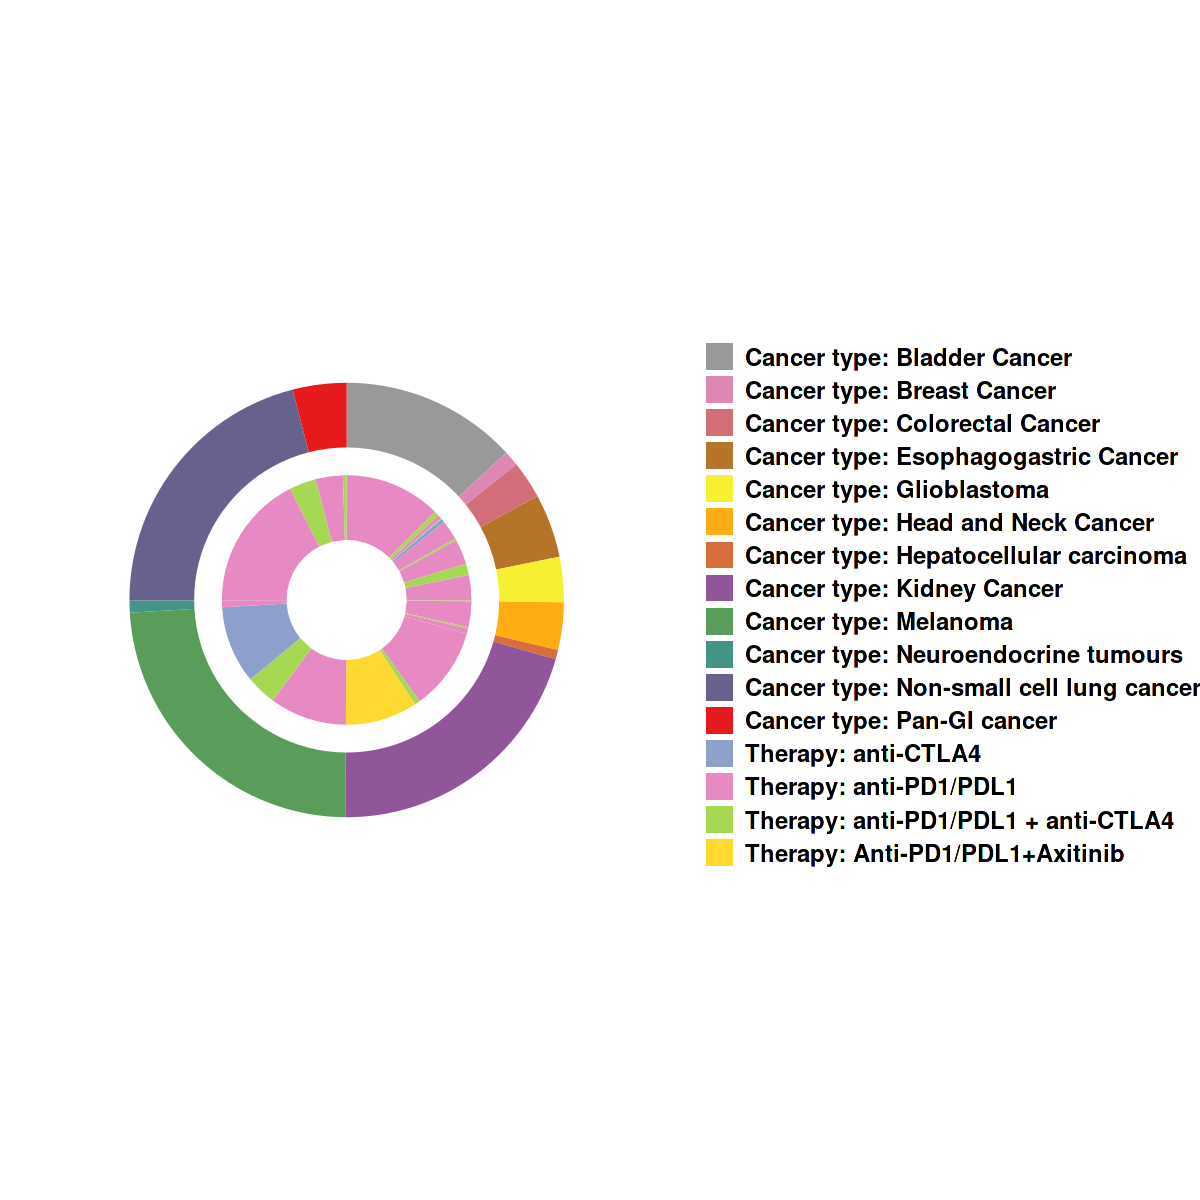

In [26]:
datasets$dataset17$THERAPY = "anti-PD1/PDL1"
datasets$dataset20$THERAPY = "anti-PD1/PDL1"
datasets$dataset19$THERAPY[ is.na(datasets$dataset19$THERAPY) ] = "anti-PD1/PDL1"

res = vector()
for(i in rownames(datasets_overview2)){
    res = rbind(res,data.frame(table(datasets[[i]]$THERAPY),i))
}

res$Cancer_type2 = datasets_overview[res$i,"Cancer_type2"]
res$Cancer_type = datasets_overview[res$i,"Cancer_type"]
res$Sequencing = datasets_overview[res$i,"Sequencing"]

res = res[ order(res$Var1),]
res = res[ order(res$Cancer_type),]

lay1 = res %>% group_by(Cancer_type) %>% summarise(sum(Freq))
lay1$lay = 2
colnames(lay1) = c("Group","Freq","lay")
lay1$Group = paste("Cancer type:",lay1$Group)

lay4 = vector()
for(i in unique(res$Cancer_type)){
    tmp_res = res[ res$Cancer_type == i,]
    for(j in unique(tmp_res$Var1)){
        tmp_res2 = tmp_res[ tmp_res$Var1 == j,]
        lay4 = rbind(lay4,c(j,sum(tmp_res2$Freq),1))
    }
}
lay4 = as.data.frame(lay4)
colnames(lay4) = c("Group","Freq","lay")
lay4$Group = paste("Therapy:",lay4$Group)
lay4$Freq = as.numeric(lay4$Freq)
lay4$lay = as.numeric(lay4$lay)

lay = rbind(lay1,lay4)

n = length(unique(lay$Group))
col2 = c(rev(colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(12)),RColorBrewer::brewer.pal(8,"Set2")[3:6])


p = ggplot(lay)+
    geom_bar(aes(x = lay,y = Freq,group = lay,fill=Group),stat="identity",position="stack",width = 0.7)+
#     ggrepel::geom_text_repel(data = lay1,aes(x = lay,y = Freq,label = Group),stat="identity",position=position_stack(vjust = 0.5))+ 
    scale_fill_manual(values = col2)+
    xlim(c(0,  3))+
    coord_polar(theta = "y")+theme_void()+
guides(fill=guide_legend(ncol = 1,override.aes = list(size=7)))+
theme(legend.title = element_blank(),legend.text = element_text(size = 14,face="bold"))
p
# ggplot()+
#     geom_bar(data = lay1,aes(x = lay,y = Freq,group = lay,fill=Group),stat="identity",position="stack",width = 0.7)+
#     geom_bar(data = lay3,aes(x = lay,y = Freq,group = lay,fill=Group),stat="identity",position="stack",width = 0.7)+
# #     ggrepel::geom_text_repel(data = lay1,aes(x = lay,y = Freq,label = Group),stat="identity",position=position_stack(vjust = 0.5))+ 
#     scale_fill_manual(values = rev(col2))+
#     xlim(c(0,  3))+
#     coord_polar(theta = "y")+theme_void()+
# guides(fill=guide_legend(ncol = 1,override.aes = list(size=5)))

In [29]:
pdf("Artical_Figure2/Figure 1/Overview3.pdf",width = 12,height = 12)
p
dev.off()

png 
  2

In [27]:
sum(lay[ lay$Group == "Therapy: anti-CTLA4","Freq"])
sum(lay[ lay$Group == "Therapy: anti-PD1/PDL1","Freq"])
sum(lay[ lay$Group == "Therapy: anti-PD1/PDL1 + anti-CTLA4","Freq"])
sum(lay[ lay$Group == "Therapy: Anti-PD1/PDL1+Axitinib","Freq"])

sum(lay[ lay$Group == "Therapy: anti-CTLA4","Freq"])+
sum(lay[ lay$Group == "Therapy: anti-PD1/PDL1","Freq"])+
sum(lay[ lay$Group == "Therapy: anti-PD1/PDL1 + anti-CTLA4","Freq"])+
sum(lay[ lay$Group == "Therapy: Anti-PD1/PDL1+Axitinib","Freq"])

[1] 417

[1] 2697

[1] 446

[1] 366

[1] 3926

In [28]:
c(2697,417,446,366)/3924

[1] 0.68730887 0.10626911 0.11365953 0.09327217

Warning message:
“Ignoring unknown parameters: width”
Warning message:
“Ignoring unknown aesthetics: fill”


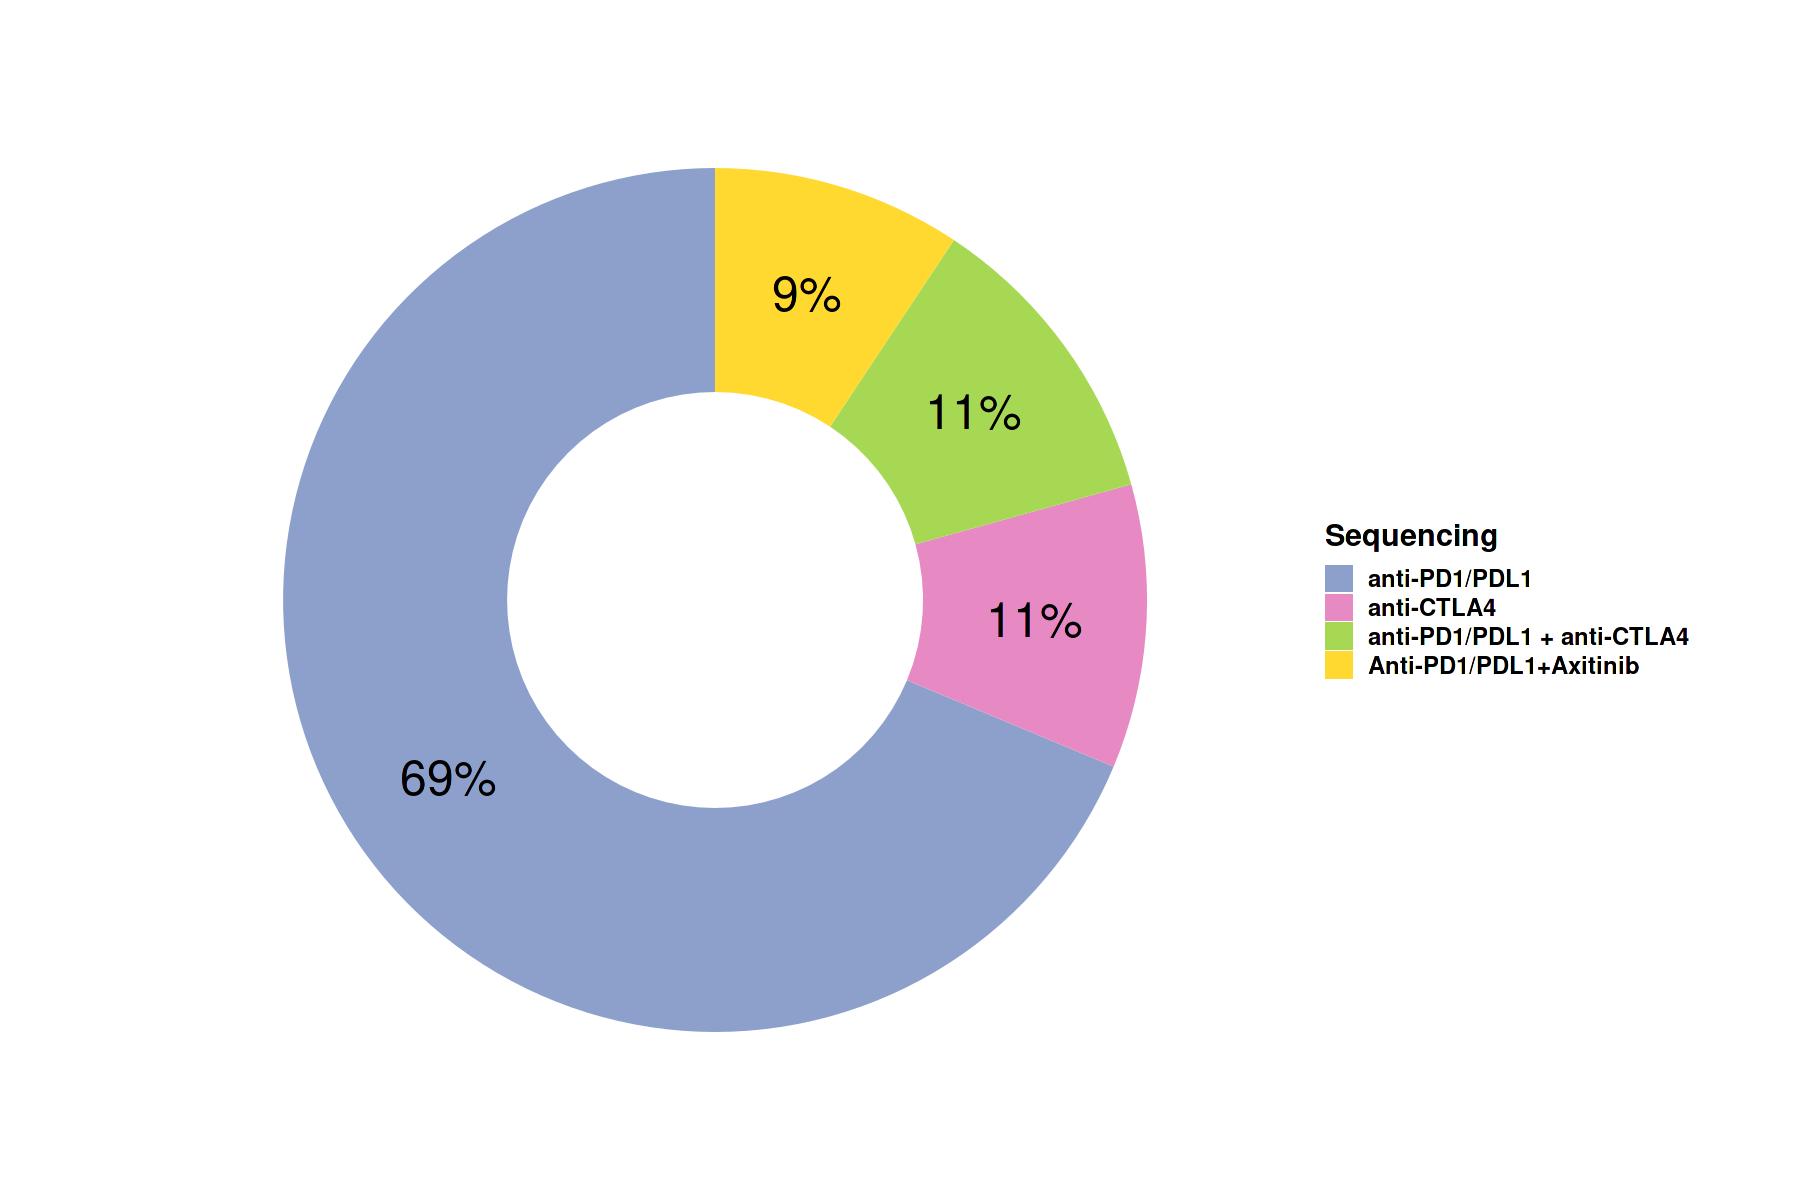

In [29]:
options(repr.plot.height = 10, repr.plot.width = 15)
tn = c("anti-PD1/PDL1","anti-CTLA4","anti-PD1/PDL1 + anti-CTLA4","Anti-PD1/PDL1+Axitinib")
p = ggplot()+
geom_bar(aes(x=1,y = c(2697,417,446,366),fill = factor(tn,levels = tn)),
         stat="identity",position="stack",width = 0.7)+
geom_text(aes(x = 1,y = c(2697,417,446,366),fill = factor(tn,levels = tn),label = c("69%","11%","11%","9%")),
          stat="identity",position=position_stack(vjust = 0.5),width = 0.7,size = 10)+
xlim(c(0,  1.5))+
labs(fill = "Sequencing")+
coord_polar(theta = "y")+
theme_void()+
scale_fill_manual(values = RColorBrewer::brewer.pal(8,"Set2")[3:6])+
theme(legend.title = element_text(size = 18,face="bold"),legend.text = element_text(size = 14,face="bold"))
p

In [30]:
pdf("Artical_Figure2/Figure 1/Overview3.pdf",width = 12,height = 12)
p
dev.off()

png 
  2

### TCGA & CPTAC

In [57]:
cptac_overview = as.data.frame(t(sapply(names(CPTAC),function(x){return(c(x,length(unique(CPTAC[[x]]$maf@data$TCGA))))})))
cptac_overview$V2 = as.numeric(cptac_overview$V2)

cptac_overview2 = read.csv("/srv/shiny-server/SNVIO_V10/data/CPTAC/CPTAC_overview.csv")
rownames(cptac_overview2) = cptac_overview2$Cohort

In [58]:
cptac_overview2$Cancer_type2 = c("GBM","PDAC","BRAC","HGSC","LSCC","LUAD","HNSCC","UCEC","CCRCC","COAD")

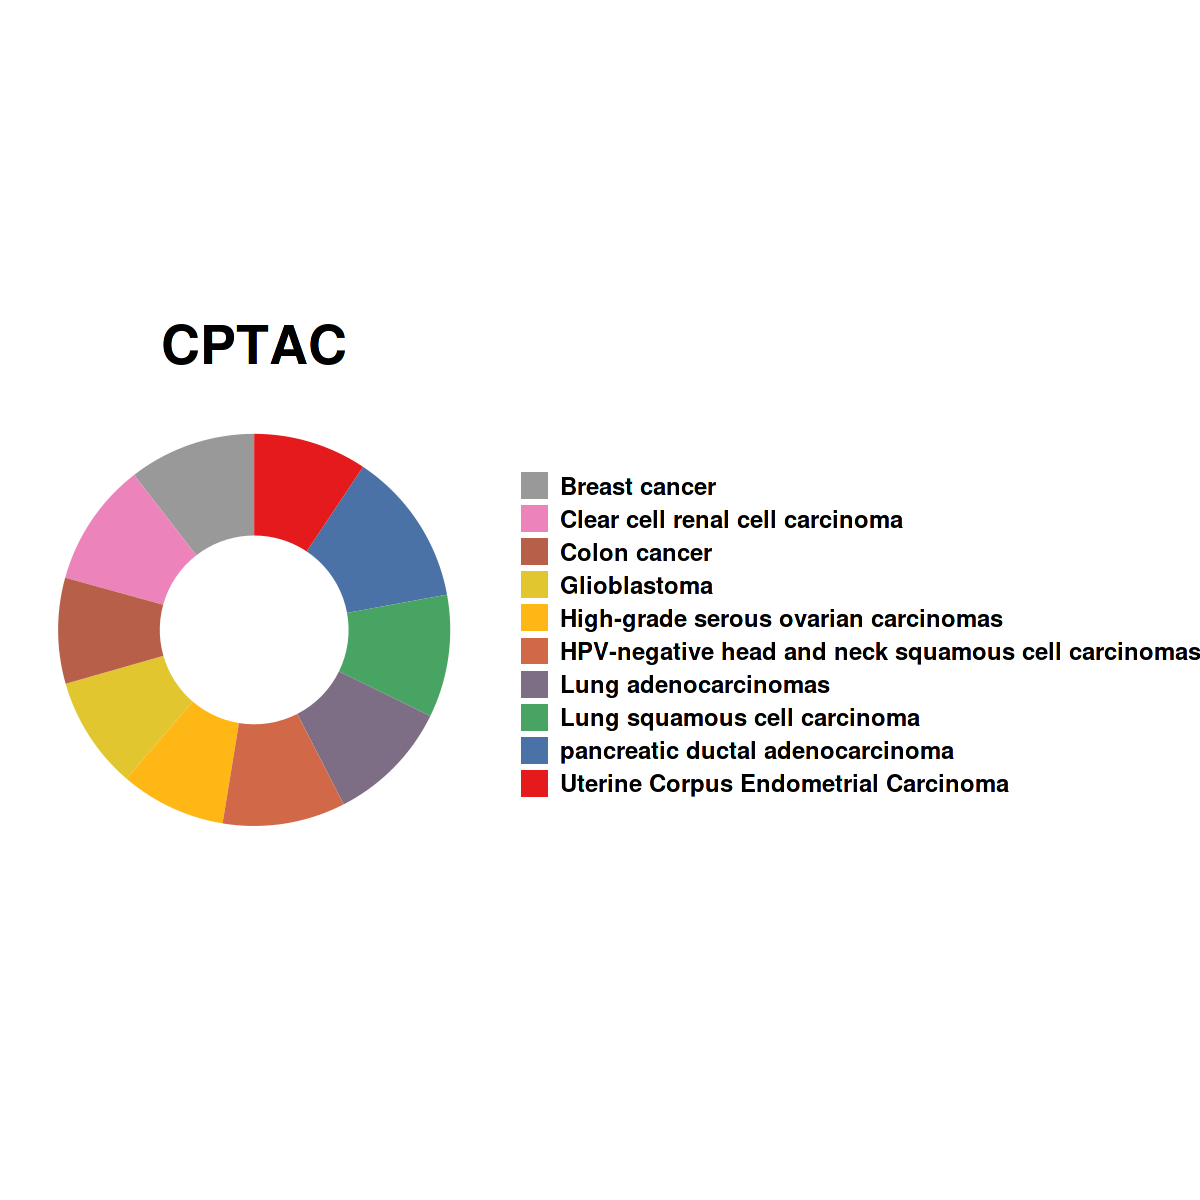

In [59]:
n = length(unique(cptac_overview2$Cancer_type))
col2 = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(n)
# col2 = c(col2[seq(1,n,by = 2)],col2[seq(2,n,by = 2)])
options(repr.plot.height = 10, repr.plot.width = 10)
ggplot(cptac_overview2)+
ggtitle("CPTAC")+
    geom_bar(aes(x = 1,y = Cohort_size,fill=Cancer_type),stat="identity",position="stack",width = 0.7)+
#     ggrepel::geom_text_repel(data = lay1,aes(x = lay,y = Freq,label = Group),stat="identity",position=position_stack(vjust = 0.5))+ 
    scale_fill_manual(values = rev(col2))+
    xlim(c(0,  1.4))+
    coord_polar(theta = "y")+theme_void()+
guides(fill=guide_legend(ncol = 1,override.aes = list(size=7)))+
theme(legend.title = element_blank(),legend.text = element_text(size = 14,face="bold"),plot.title = element_text(size = 32,face = "bold",hjust = 0.5))

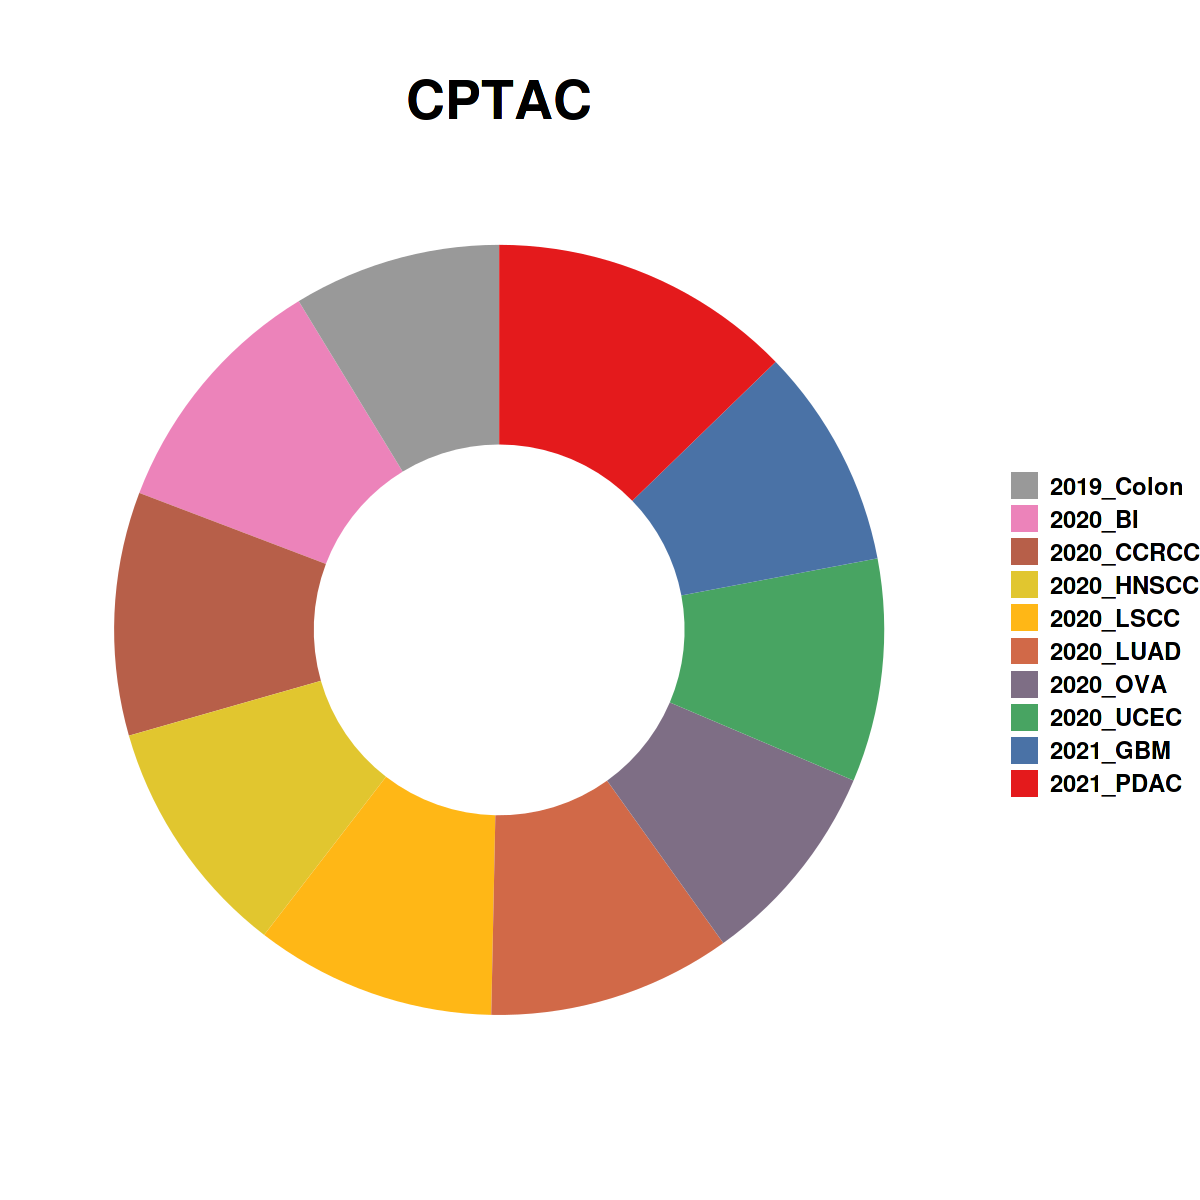

In [60]:
n = length(unique(cptac_overview$V1))
col2 = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(n)
# col2 = c(col2[seq(1,n,by = 2)],col2[seq(2,n,by = 2)])
options(repr.plot.height = 10, repr.plot.width = 10)
ggplot(cptac_overview)+
ggtitle("CPTAC")+
    geom_bar(aes(x = 1,y = V2,fill=V1),stat="identity",position="stack",width = 0.7)+
#     ggrepel::geom_text_repel(data = lay1,aes(x = lay,y = Freq,label = Group),stat="identity",position=position_stack(vjust = 0.5))+ 
    scale_fill_manual(values = rev(col2))+
    xlim(c(0,  1.4))+
    coord_polar(theta = "y")+theme_void()+
guides(fill=guide_legend(ncol = 1,override.aes = list(size=7)))+
theme(legend.title = element_blank(),legend.text = element_text(size = 14,face="bold"),plot.title = element_text(size = 32,face = "bold",hjust = 0.5))

In [61]:
TCGA_overview = as.data.frame(t(sapply(names(TCGA),function(x){return(c(x,length(unique(TCGA[[x]]$maf@data$Tumor_Sample_Barcode))))})))
TCGA_overview$V2 = as.numeric(TCGA_overview$V2)

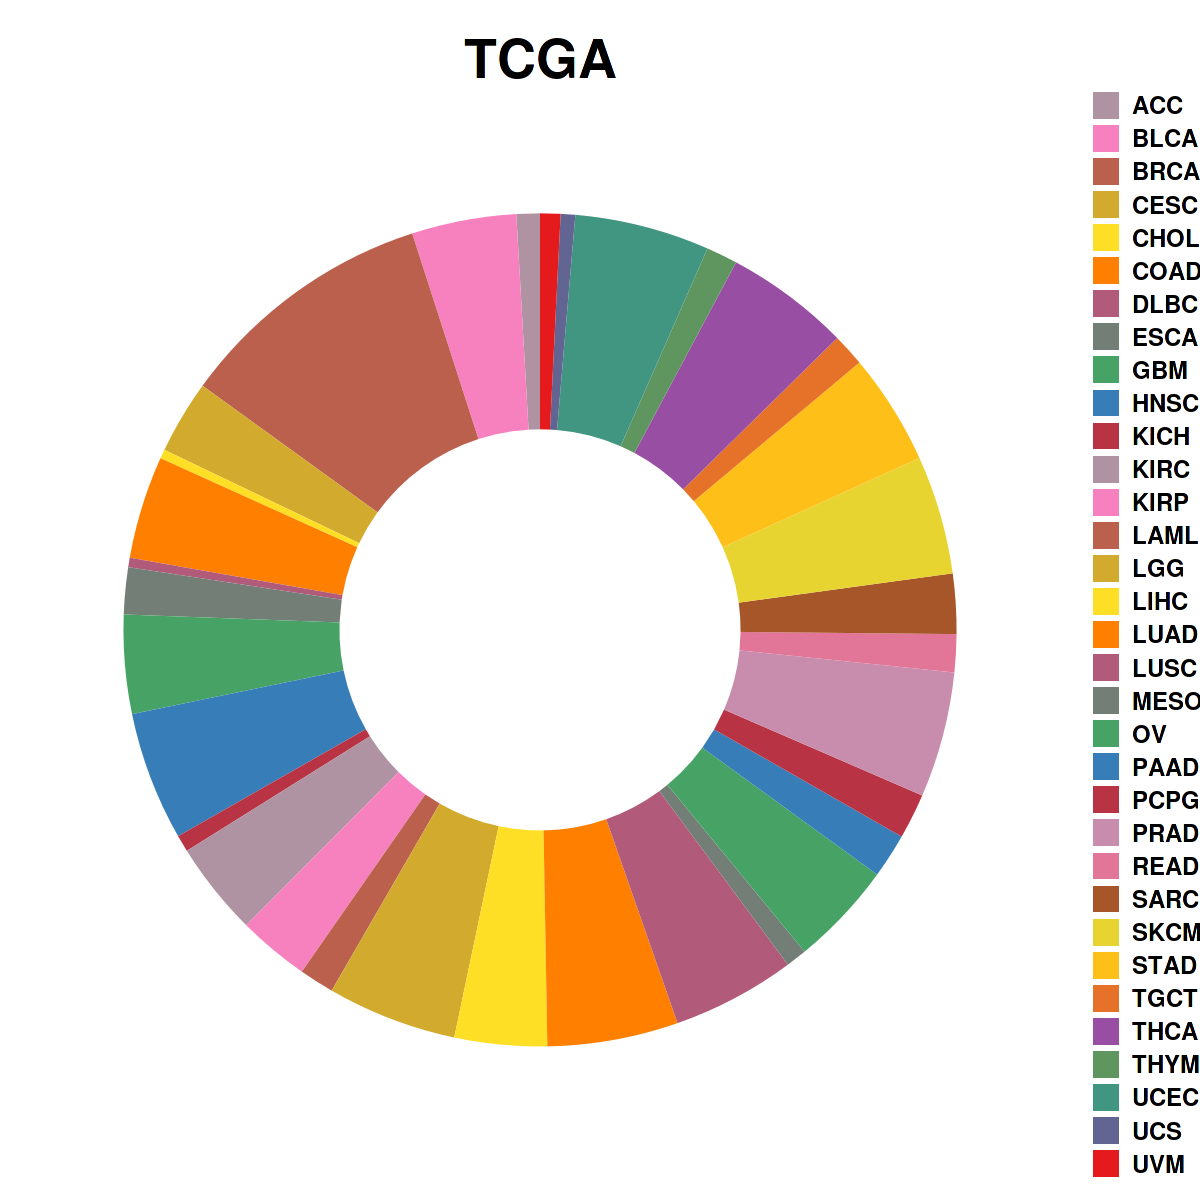

In [62]:
n = length(unique(TCGA_overview$V1))
col2 = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(n)
col2 = c(col2[seq(1,n,by = 3)],col2[seq(2,n,by = 3)],col2[seq(2,n,by = 3)])

options(repr.plot.height = 10, repr.plot.width = 10)
ggplot(TCGA_overview)+
ggtitle("TCGA")+
    geom_bar(aes(x = 1,y = V2,fill=V1),stat="identity",position="stack",width = 0.7)+
#     ggrepel::geom_text_repel(data = lay1,aes(x = lay,y = Freq,label = Group),stat="identity",position=position_stack(vjust = 0.5))+ 
    scale_fill_manual(values = rev(col2))+
    xlim(c(0,  1.4))+
    coord_polar(theta = "y")+theme_void()+
guides(fill=guide_legend(ncol = 1,override.aes = list(size=7)))+
theme(legend.title = element_blank(),legend.text = element_text(size = 14,face="bold"),plot.title = element_text(size = 32,face = "bold",hjust = 0.5))

### Web Ehcart Graph Data

In [63]:
library(rjson)
library(jsonlite)

datasets_overview2 = datasets_overview[ !rownames(datasets_overview) %in% c("dataset1","dataset3","dataset6"),]


Attaching package: ‘jsonlite’


The following objects are masked from ‘package:rjson’:

    fromJSON, toJSON




In [64]:
lay1_colors = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(9)
ref_total = list()
n1 = 1
for( i in unique(datasets_overview2$Cancer_type)){
    
    ref_list = list()
    ref_list[["name"]] = i
    ref_list[["value"]] = sum(datasets_overview2[datasets_overview2$Cancer_type == i,"Cohort_size"])  
    ref_list[["itemStyle"]] = list(color = lay1_colors[n1])
    ref_list[["children"]] = list()
    n2 = 1
    lay2_colors = colorRampPalette(RColorBrewer::brewer.pal(9,"Paired"))(length(datasets_overview2[datasets_overview2$Cancer_type == i,"Cohort_name"]))
    for(j in datasets_overview2[datasets_overview2$Cancer_type == i,"Cohort_name"]){
        
        children_list = list()
        children_list[["name"]] = datasets_overview2[datasets_overview2$Cohort_name == j,"Cohort"]
        children_list[["value"]] = datasets_overview2[datasets_overview2$Cohort_name == j,"Cohort_size"]
        children_list[["itemStyle"]] = list(color = lay2_colors[n2])
        ref_list[["children"]][[n2]] = children_list
        n2 = n2 + 1
    }
    ref_total[[n1]] = ref_list
    n1 = n1 +1
   
    
}

In [65]:
TCGA_total = list()
lay1_colors = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(nrow(TCGA_overview))
n = 1
for(i in TCGA_overview$V1){
    TCGA_total[[n]] = list(name=i,value=TCGA_overview[i,"V2"],itemStyle=list(color=lay1_colors[n]))
    n = n + 1
}

In [66]:
CPTAC_total = list()
lay1_colors = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(nrow(cptac_overview2))
n = 1
for(i in cptac_overview2$Cohort){
    CPTAC_total[[n]] = list(name=cptac_overview2[i,"Cancer_type2"],
                            value=cptac_overview2[i,"Cohort_size"],
                            itemStyle=list(color=lay1_colors[n]),
                            children=list(list( 
                                          name=cptac_overview2[i,"Cohort"],
                                          value=cptac_overview2[i,"Cohort_size"],
                                          itemStyle=list(color=lay1_colors[n])
                                        ))
                           )
    n = n + 1
}

In [67]:
total = list(
            list(name="Reference",
                 itemStyle=list(color="#E41A1C"),
                 children=ref_total
                ),
            list(name="TCGA",
                 itemStyle=list(color="#377EB8"),
                 children=TCGA_total
                ),
            list(name="CPTAC",
                 itemStyle=list(color="#4DAF4A"),
                 children=CPTAC_total
                )
            )

In [68]:
datajson <- toJSON(total, pretty=T,auto_unbox = T)
datajson2 <- prettify(datajson , indent = 4)

In [69]:
datajson2

[
    {
        "name": "Reference",
        "itemStyle": {
            "color": "#E41A1C"
        },
        "children": [
            {
                "name": "Bladder Cancer",
                "value": 516,
                "itemStyle": {
                    "color": "#E41A1C"
                },
                "children": [
                    {
                        "name": "Samstein et al",
                        "value": 215,
                        "itemStyle": {
                            "color": "#A6CEE3"
                        }
                    },
                    {
                        "name": "Miao et al.",
                        "value": 27,
                        "itemStyle": {
                            "color": "#FB9A99"
                        }
                    },
                    {
                        "name": "Mariathasan et al.",
                        "value": 274,
                        "itemStyle": {
                            "col

##### sankey

In [70]:
TCGA_overview = as.data.frame(t(sapply(names(TCGA),function(x){return(c(x,length(unique(TCGA[[x]]$maf@data$Tumor_Sample_Barcode))))})))
TCGA_overview$V2 = as.numeric(TCGA_overview$V2)

In [71]:
sum(TCGA_overview$V2)
sum(cptac_overview$V2)

[1] 10131

[1] 1067

In [72]:
sum(datasets_overview2[ datasets_overview2$Sequencing == "WES",]$Cohort_size)
sum(datasets_overview2[ datasets_overview2$Sequencing == "Panel",]$Cohort_size)

[1] 1688

[1] 2238

In [73]:
tmp_res = c()
for(i in rownames(datasets_overview2)[datasets_overview2$Sequencing == "WES"]){
    tmp_res = c(tmp_res,datasets[[i]]$THERAPY)
}
table(tmp_res)

tmp_res
                anti-CTLA4              anti-PD1/PDL1 
                       319                        869 
anti-PD1/PDL1 + anti-CTLA4     Anti-PD1/PDL1+Axitinib 
                       134                        366 

In [74]:
tmp_res = c()
for(i in rownames(datasets_overview2)[datasets_overview2$Sequencing == "Panel"]){
    tmp_res = c(tmp_res,datasets[[i]]$THERAPY)
}
table(tmp_res)

tmp_res
                anti-CTLA4              anti-PD1/PDL1 
                        98                       1828 
anti-PD1/PDL1 + anti-CTLA4 
                       312 

In [77]:
tmp_res = c()
for(i in setdiff(names(datasets_rna_wes),"dataset6")){
    share_id = intersect(colnames(datasets_rna_wes[[i]]$RNA),rownames(datasets[[i]]))
    print(length(share_id))
    tmp_res = c(tmp_res,datasets[[i]][share_id,"THERAPY"])
}
table(tmp_res)

[1] 40
[1] 27
[1] 21
[1] 274
[1] 123
[1] 337
[1] 16
[1] 46
[1] 121


tmp_res
            anti-CTLA4          anti-PD1/PDL1 Anti-PD1/PDL1+Axitinib 
                    61                    607                    337 

In [78]:
10131+1067+1688+2238-(1828+869-607)-(319+98-61)-(366-337)-446

[1] 12203